# Setup

## Import and setup

First, import the necessary libraries for data manipulation and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot

# Set the visual style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Data Loading and Preprocessing

Load the data and handle basic preprocessing steps like converting timestamps and handling missing values, which is essential before analysis.

In [2]:
# Load the dataset
df = pd.read_csv('aqi_data.csv')

# Convert timestamp to datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Change the timestamp to GMT+7
df['timestamp'] = df['timestamp'] + pd.Timedelta(hours=7)

# Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Drop rows with missing values in critical numerical columns for accurate plotting
numeric_cols = ['aqi', 'pm25', 'pm10', 'co', 'so2', 'no2', 'o3']
df_clean = df.dropna(subset=numeric_cols).copy()

# Display basic info
print("\nData Info:")
print(df_clean.info())
print("\nFirst 5 rows:")
display(df_clean.head())

Missing values before cleaning:
 id             0
timestamp      0
location       0
aqi           10
pm25         149
pm10         147
co           147
so2          153
no2          155
o3           148
dtype: int64

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 34558 entries, 0 to 34733
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   id         34558 non-null  int64              
 1   timestamp  34558 non-null  datetime64[ns, UTC]
 2   location   34558 non-null  object             
 3   aqi        34558 non-null  float64            
 4   pm25       34558 non-null  float64            
 5   pm10       34558 non-null  float64            
 6   co         34558 non-null  float64            
 7   so2        34558 non-null  float64            
 8   no2        34558 non-null  float64            
 9   o3         34558 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), 

,id,timestamp,location,aqi,pm25,pm10,co,so2,no2,o3
0,1,2025-11-15 05:31:20.762336+00:00,Hanoi,82.0,26.0,51.0,1000.0,24.0,50.0,12.0
1,2,2025-11-14 22:52:11.364104+00:00,Hanoi,82.0,26.0,51.0,1000.0,24.0,50.0,12.0
2,3,2025-11-14 23:24:27.293915+00:00,Hanoi,82.0,26.0,51.0,1000.0,24.0,50.0,12.0
3,4,2025-11-14 23:50:40.960440+00:00,Ba Ria Vung Tau,72.0,20.0,34.0,482.0,5.0,20.0,30.0
4,5,2025-11-14 23:50:42.362669+00:00,Bac Giang,94.0,32.0,47.0,975.0,17.0,48.0,10.0


In [3]:
unique_locations = df_clean["location"].unique()
print(unique_locations)
print(f"Num of unique provinces: {len(unique_locations)}")

['Hanoi' 'Ba Ria Vung Tau' 'Bac Giang' 'Bac Ninh' 'Binh Dinh' 'Binh Duong'
 'Can Tho' 'Cao Bang' 'Da Nang' 'Gia Lai' 'Ha Nam' 'Ha Nam Province'
 'Ha Noi' 'Hai Duong' 'Hai Phong' 'Ho Chi Minh' 'Hung Yen'
 'Hoa Binh Province' 'Khanh Hoa' 'Lam Dong' 'Lang Son' 'Lang Son Province'
 'Lao Cai' 'Long An' 'Nghe An' 'Ninh Binh' 'Ninh Thuan' 'Phu Tho'
 'Quang Binh Province' 'Quang Nam' 'Quang Ngai' 'Quang Ninh'
 'Quang Ninh Province' 'Quang Tri' 'Son La' 'Tay Ninh' 'Thai Binh'
 'Thai Binh Province' 'Thua Thien Hue' 'Tra Vinh' 'Tuyen Quang Province'
 'Vinh Long' 'Vinh Phuc']
Num of unique provinces: 43


In [4]:
# 1. Standardize formatting: remove trailing " Province" and extra spaces
df_clean['location'] = df_clean['location'].str.replace(' Province', '', case=False).str.strip()

# 2. Define a mapping for specific spelling inconsistencies
mapping = {
    'Ha Noi': 'Hanoi',
    # Add any other manual fixes here if needed
}

# 3. Apply the mapping
df_clean['location'] = df_clean['location'].replace(mapping)

# Check the results
unique_locations = df_clean['location'].unique()
print(unique_locations)
print(f"Num of unique provinces: {len(unique_locations)}")

['Hanoi' 'Ba Ria Vung Tau' 'Bac Giang' 'Bac Ninh' 'Binh Dinh' 'Binh Duong'
 'Can Tho' 'Cao Bang' 'Da Nang' 'Gia Lai' 'Ha Nam' 'Hai Duong' 'Hai Phong'
 'Ho Chi Minh' 'Hung Yen' 'Hoa Binh' 'Khanh Hoa' 'Lam Dong' 'Lang Son'
 'Lao Cai' 'Long An' 'Nghe An' 'Ninh Binh' 'Ninh Thuan' 'Phu Tho'
 'Quang Binh' 'Quang Nam' 'Quang Ngai' 'Quang Ninh' 'Quang Tri' 'Son La'
 'Tay Ninh' 'Thai Binh' 'Thua Thien Hue' 'Tra Vinh' 'Tuyen Quang'
 'Vinh Long' 'Vinh Phuc']
Num of unique provinces: 38


## Summary Statistics

The slides emphasize understanding central tendency (mean, median, mode) and dispersion (variance, standard deviation, range).

In [5]:
# Descriptive statistics (Mean, Std, Min, Max, Quartiles)
print("Summary Statistics:")
display(df_clean[numeric_cols].describe())

# Check for Skewness and Kurtosis (to understand distribution shape)
print("\nSkewness:\n", df_clean[numeric_cols].skew())
print("\nKurtosis:\n", df_clean[numeric_cols].kurt())

Summary Statistics:


,aqi,pm25,pm10,co,so2,no2,o3
count,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000
mean,96.534551,34.416372,46.602523,484.500058,8.700938,18.527461,30.430233
std,40.808438,24.338466,27.959643,244.168941,6.190044,15.078619,14.635787
min,17.000000,3.000000,4.000000,89.000000,1.000000,1.000000,2.000000
25%,66.000000,18.000000,26.000000,282.000000,4.000000,9.000000,20.000000
50%,85.000000,28.000000,40.000000,446.000000,8.000000,15.000000,29.000000
75%,124.000000,45.000000,60.000000,651.000000,13.000000,24.000000,40.000000
max,279.000000,204.000000,244.000000,1000.000000,36.000000,164.000000,104.000000



Skewness:
 aqi     0.693034
pm25    1.614067
pm10    1.382951
co      0.525480
so2     0.844360
no2     3.942188
o3      0.603158
dtype: float64

Kurtosis:
 aqi     -0.226438
pm25     3.656540
pm10     3.047503
co      -0.674966
so2      0.311510
no2     25.731681
o3       0.352719
dtype: float64


Data Distribution is Skewed (Not Normal):

- summary statistics show that NO2 (Skewness: ~3.94) and PM2.5 (Skewness: ~1.61) are highly skewed to the right.

- Kurtosis is high, particularly for NO2 (25.7) and PM2.5 (3.65). This indicates "heavy tails," meaning your data has frequent extreme values (pollution spikes) rather than a smooth, bell-shaped curve.

 -> Insight: Standard machine learning models (like Linear Regression) often assume normal distribution. We may need to apply transformations (like Log or Box-Cox) to these features before feeding them into a model.

# Univriate Analysis

## AQI

### Histogram of AQI

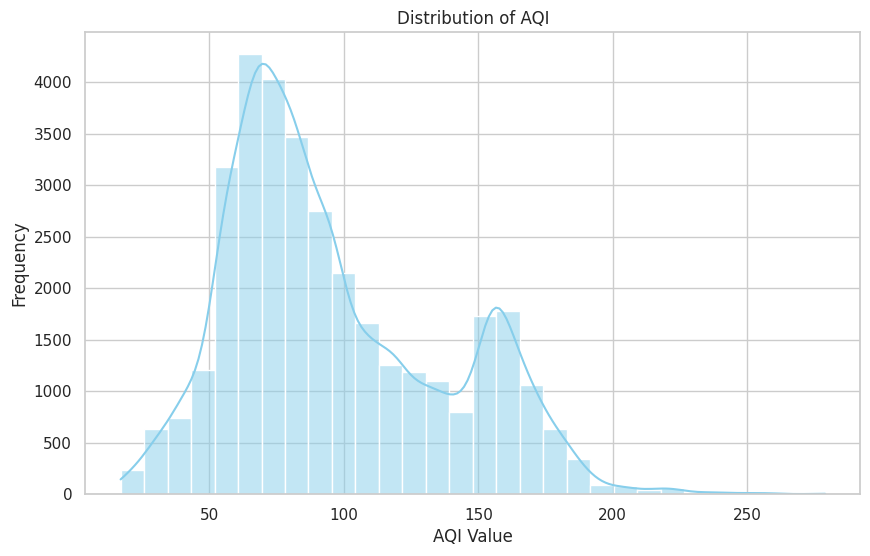

In [6]:

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['aqi'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of AQI')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

#### The "Bimodal" Distribution

The histogram shows two distinct peaks (modes), suggesting that data likely contains two different environmental conditions:

- **The Primary Peak (~70 AQI)**: The majority of the readings fall in the "Moderate" range (50–100). This represents the standard, day-to-day air quality for most locations.

- **The Secondary Peak (~160 AQI)**: There is a noticeable "hump" around 150–175. This is a crucial insight—it suggests a specific group of locations or a specific time period (like rush hour or a wildfire season) where air quality consistently enters the "Unhealthy" category.

#### The "Hazardous" Outliers
**Frequency of Extremes**: The histogram shows that while values above 200 are rare (low frequency), they are persistent.

**Outlier Density**: The box plot shows a dense cluster of outliers between 210 and 260. These aren't just one-off errors; there is a significant volume of data representing "Very Unhealthy" conditions.

### Box Plot of AQI
Useful for detecting outliers as mentioned in the slides

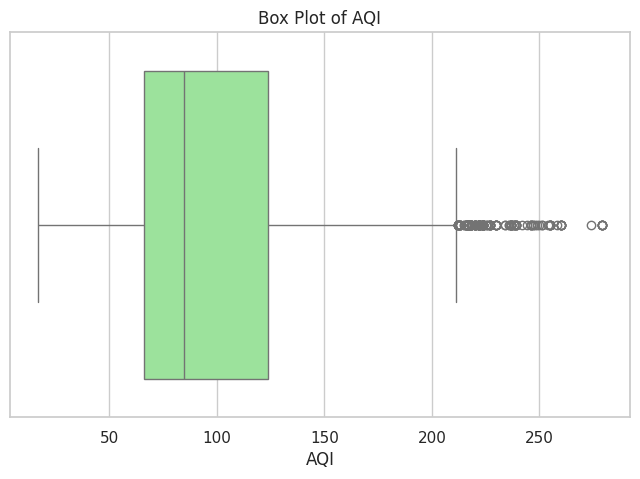

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['aqi'], color='lightgreen')
plt.title('Box Plot of AQI')
plt.xlabel('AQI')
plt.show()

In [8]:
df_clean["aqi"].describe()

count    34558.000000
mean        96.534551
std         40.808438
min         17.000000
25%         66.000000
50%         85.000000
75%        124.000000
max        279.000000
Name: aqi, dtype: float64

In [9]:
df_clean["aqi"].median()

85.0

#### Central Tendency and Typical Range
**Median (The Center Line)**: The vertical line inside the green box is at 85. This means that 50% of thr recorded days have an AQI below 85, and 50% are above.

**Interquartile Range (IQR)**: The green box represents the middle 50% of your data.

- 25th Percentile (Left edge): 66.

- 75th Percentile (Right edge): 124.

**Insight**: The "typical" air quality fluctuates between 65 and 123, which generally spans from "Moderate" to "Unhealthy for Sensitive Groups"

#### Variability and Spread

**Overall Range**: Excluding outliers, the air quality ranges from a minimum of about 20 to a maximum (at the right "whisker") of about 210.

**Skewness**: The median line is shifted toward the left side of the box, and the right whisker is much longer than the left. This indicates that the data is Right-Skewed.

**Insight**: While most days have relatively lower AQI, there is a strong tendency for the air quality to occasionally "stretch" into much higher, more dangerous levels.

#### Outlier Analysis
**The "Dots"**: The circles on the far right (from 215 to 280) are statistically significant outliers.

**Insight**: These represent extreme pollution events—likely heavy smog days, wildfires, or industrial incidents. Because these dots are clustered together rather than being a single lone point, it suggests that these extreme pollution levels occur with some regularity rather than being a one-time sensor error.

### Pie Chart of AQI Categories
Categorize AQI into standard levels for a pie chart

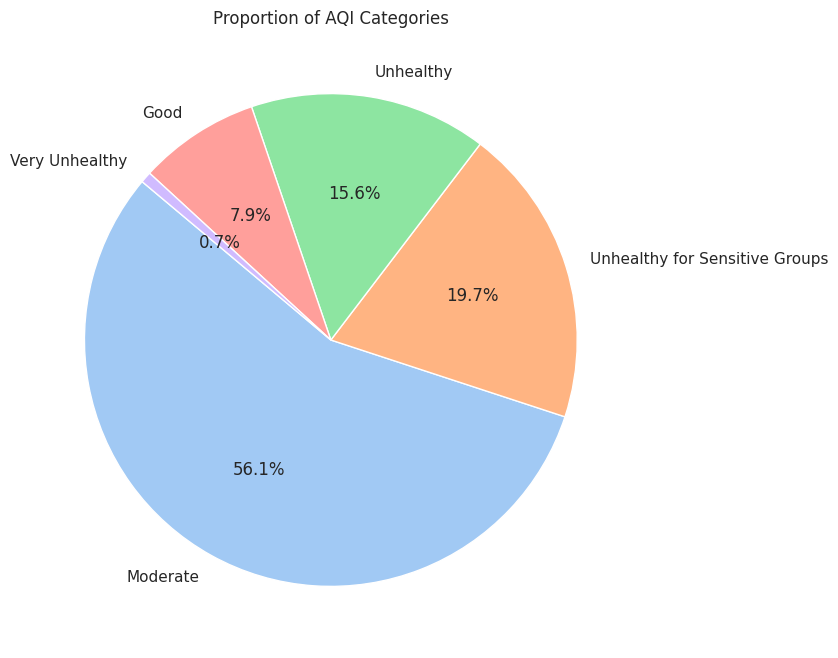

In [10]:
def categorize_aqi(x):
    if x <= 50: return 'Good'
    elif x <= 100: return 'Moderate'
    elif x <= 150: return 'Unhealthy for Sensitive Groups'
    elif x <= 200: return 'Unhealthy'
    elif x <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'

aqi_cats = df_clean['aqi'].apply(categorize_aqi).value_counts()

plt.figure(figsize=(8, 8))
plt.pie(aqi_cats, labels=aqi_cats.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of AQI Categories')
plt.show()

#### AQI (Air Quality Index) Overview

The AQI data shows that the majority of locations experience "Moderate" air quality, but there is a significant secondary peak of concern.

**Dominant Category**: 56.1% of all observations fall into the Moderate category (AQI 51–100).

**Health Risk**: Over 35% of the data falls into categories that are Unhealthy for Sensitive Groups (19.7%) or Unhealthy (15.6%).

## PM25

### Histogram of PM25

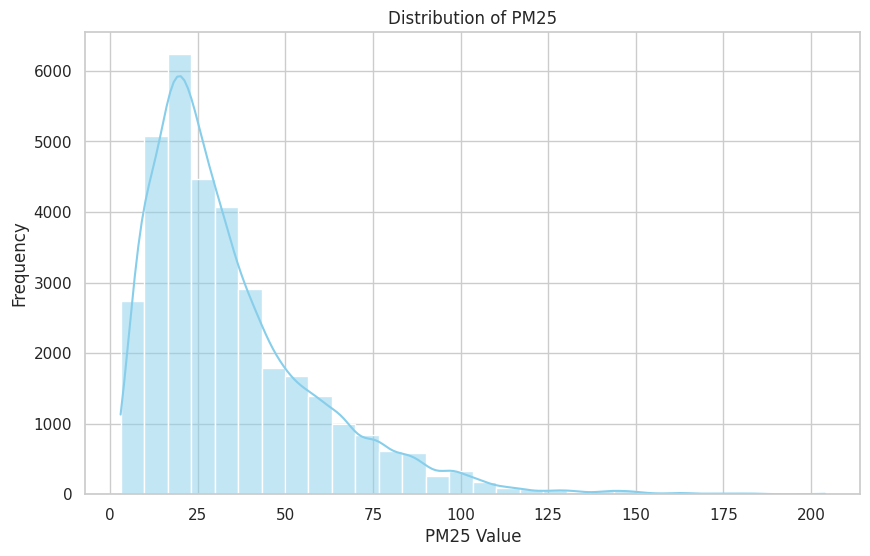

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['pm25'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of PM25')
plt.xlabel('PM25 Value')
plt.ylabel('Frequency')
plt.show()

Unlike the AQI data, which showed two distinct peaks, the PM2.5 data follows a **Log-Normal Distribution** (a classic "long-tail" shape).

#### The "Healthy" Bulk
**The Mode (The Peak)**: The highest frequency of readings occurs between 15 and 25. This indicates that for most of your data points, PM2.5 levels are relatively low.

**Concentration of Data**: The vast majority of the data is clustered below 50. This suggests that "Good" to "Moderate" air quality is the baseline for these locations.

#### Significant Right Skew (The Long Tail)
**The Stretching Tail**: Notice how the bars continue all the way out to 200, even though they get very short. This is a "heavy-tailed" distribution.

**Insight**: While high PM2.5 events are less frequent than moderate ones, they are not just "errors"—there is a consistent presence of high-pollution events that significantly pull the Mean higher than the Median.

#### Comparison with the AQI Distribution
This chart provides a "smoking gun" for your earlier AQI findings:

**AQI vs. PM2.5**: AQI chart had a secondary peak at 160. However, this PM2.5 chart is unimodal (it only has one main hump).

**The Insight**: This suggests that PM2.5 might not be the pollutant responsible for that second "Unhealthy" hump in the AQI data. If PM2.5 were the main driver, we would likely see a second hump here as well.

**Suspects**: Should check the distributions of other pollutants. One of those likely has a bimodal distribution that matches the AQI pattern.

### Box Plot of PM25

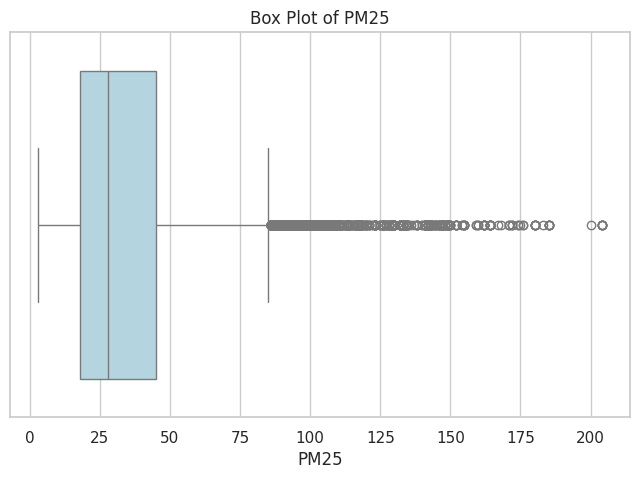

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['pm25'], color='lightblue')
plt.title('Box Plot of PM25')
plt.xlabel('PM25')
plt.show()

In [13]:
df_clean["pm25"].describe()

count    34558.000000
mean        34.416372
std         24.338466
min          3.000000
25%         18.000000
50%         28.000000
75%         45.000000
max        204.000000
Name: pm25, dtype: float64

In [14]:
df_clean["pm25"].median()

28.0

#### Central Tendency and Typical Range


**Typical Range (IQR)**: The box plot shows that 50% of your data falls between approximately 18 and 45. This represents the "normal" range for these locations.

**Median (~28)**: The median value sits on the lower end of the box, indicating that while there are high spikes, the majority of the time the air is relatively clear of fine particulates.

**The Peak (Mode)**: The histogram confirms this, with the highest frequency of readings occurring around the 20-25 mark.

#### Distribution Shape

**Log-Normal/Right Skew**: The data is heavily right-skewed. You have a very high frequency of low values and a long, thinning "tail" that extends toward the right.

**Skewness Insight**: Because the mean is likely much higher than the median, a few very bad pollution days are disproportionately affecting the average, even if most days are "clean."

#### Outlier and Extreme Event Analysis

**The Upper Whisker**: The "normal" variation of PM25 ends at approximately 85. Any reading above this is considered a statistical outlier.

**Hazardous Spikes**: There is a significant number of outliers—the dense trail of dots in the box plot—extending from 85 all the way to 200.

**Frequency of Extremes**: In the histogram, notice that while the bars get very short after 100, they are continuous. This suggests that while 100+ PM25 levels are rare, they are a persistent part of the environment rather than one-off sensor errors.

## PM10


### Histogram of PM10

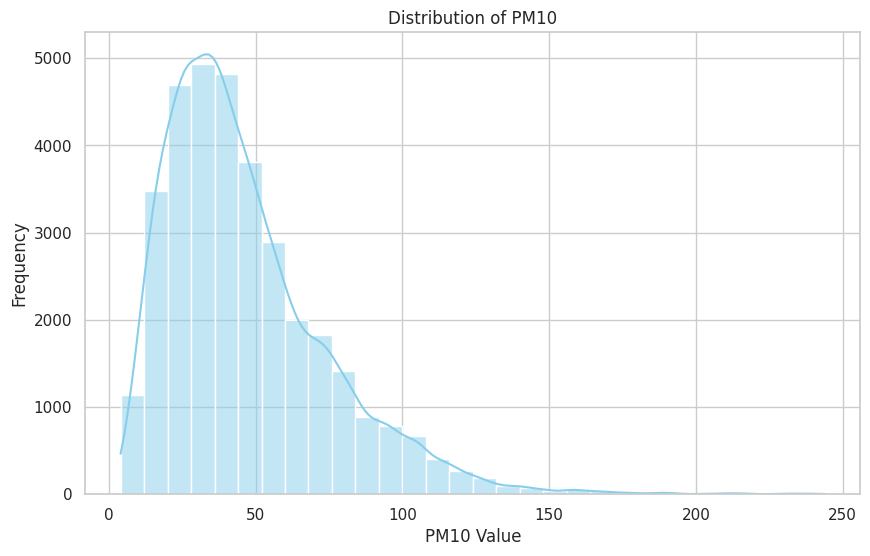

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['pm10'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of PM10')
plt.xlabel('PM10 Value')
plt.ylabel('Frequency')
plt.show()

#### Typical Range and Concentration

**Most Frequent Values (Mode)**: The highest frequency of readings occurs between 25 and 45. This represents the standard "baseline" for particulate matter in the 10-micrometer range across the collected locations.

**Mass Concentration**: The bulk of the data is concentrated below 100. This indicates that, for the majority of the time, PM10 levels stay within a relatively stable, non-extreme range.

#### Distribution Shape

**Right-Skewed (Positive Skew)**: The distribution has a steep climb on the left and a very long, thinning "tail" that extends toward the right.

**Skewness Insight**: Because the tail stretches out significantly further than the head, the Mean (average) will be higher than the Median. This tells us that while most days have low PM10, the few "bad" days are quite severe and pull the average up.

#### Presence of Extreme Events

**The Long Tail**: The histogram shows continuous, albeit low-frequency, bars extending from 100 all the way to 250.

**Insight on Extremes**: Unlike a normal "bell curve" where data would drop to zero quickly, these high values persist. This indicates that these locations experience periodic but significant pollution spikes—likely due to dust, construction, or specific industrial activities.

### Box Plot of PM10

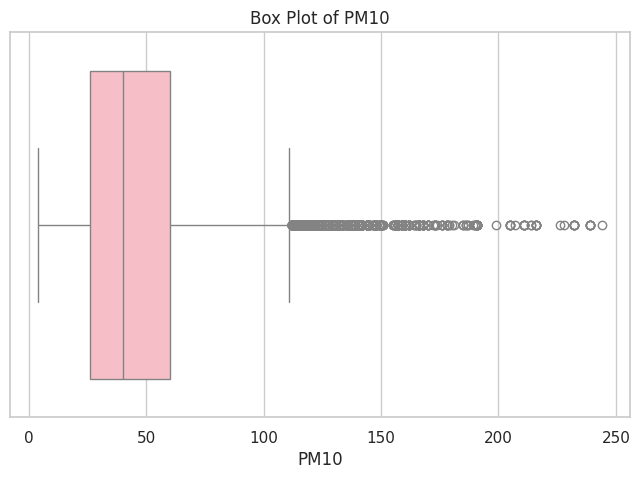

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['pm10'], color='lightpink')
plt.title('Box Plot of PM10')
plt.xlabel('PM10')
plt.show()

In [17]:
df_clean["pm10"].describe()

count    34558.000000
mean        46.602523
std         27.959643
min          4.000000
25%         26.000000
50%         40.000000
75%         60.000000
max        244.000000
Name: pm10, dtype: float64

In [18]:
df_clean["pm10"].median()

40.0

#### Central Tendency and Baseline

**Most Frequent Values (Mode)**: The histogram shows that the highest frequency of readings occurs between 25 and 45. This represents the standard "baseline" for particulate matter in the 10-micrometer range across the recorded data.

**Median (40)**: The median value (the line inside the pink box) sits at 40. This means half of observations recorded PM10 levels below this point.

**Typical Range (IQR)**: The pink box shows that the middle 50% of your data (the Interquartile Range) falls between roughly 28 and 62.

#### Distribution Shape

**Right-Skewed Distribution**: The data is heavily right-skewed. You have a high concentration of low values on the left and a very long, thinning "tail" that extends toward the right.

**Skewness Insight**: Because the tail is much longer than the head of the distribution, the Mean (average) will be pulled higher than the Median. This indicates that while most days have relatively low PM10, a few very "dirty" days significantly impact the overall average.

#### Outliers and Extreme Variability

**Normal Variation Limit**: The upper whisker of the box plot ends at approximately 112. In this dataset, any reading above this level is statistically considered an outlier.

**Presence of Extremes**: There is a dense cluster of outliers (individual dots) extending from 112 all the way to 245.

**Environmental Insight**: The fact that these dots are continuous rather than isolated suggests that these high-pollution events are a recurring environmental feature (likely due to dust, construction, or industry) rather than one-time sensor errors.

## $\ce{CO}$

### HIstogram of $\ce{CO}$

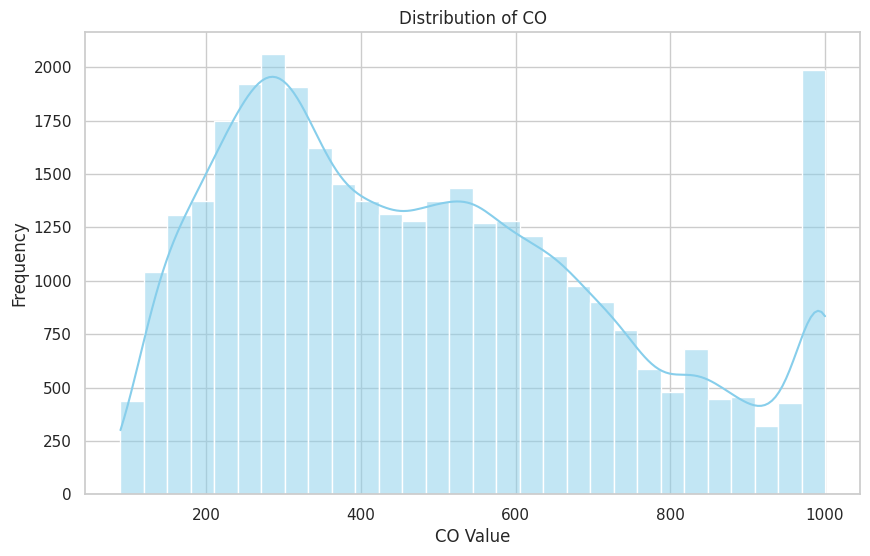

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['co'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of CO')
plt.xlabel('CO Value')
plt.ylabel('Frequency')
plt.show()

#### Typical Range and Concentration

**Primary Concentration**: The bulk of the CO readings are concentrated between 200 and 400.

**Most Frequent Value (Mode)**: The highest peak (mode) occurs around 275-300, representing the most common atmospheric CO level recorded in this dataset.

**Secondary Concentration**: There is a secondary, broader plateau of data points between 450 and 650, suggesting a significant number of observations at higher baseline levels.

#### Distribution Shape

**Multimodal Distribution**: Unlike the particulate matter pollutants, this distribution is complex and has multiple peaks. This suggests that CO levels are likely influenced by several distinct factors or "modes" of activity (e.g., standard background levels, heavy traffic periods, and industrial output).

**Right-Skewed with a Final Spike**: While the overall trend shows a decrease in frequency as values increase, there is a very unusual and sharp terminal spike at the far right of the graph.

#### Presence of Extreme Events

**The 1000 Value Spike**: There is a massive, isolated spike at the 1000 mark.

**Sensor Saturation or Data Capping**: This extreme peak at the very edge of the x-axis often indicates "clipped" data or sensor saturation—where the actual CO level might have exceeded the instrument's measurement limit, causing all high values to be recorded as exactly 1000.

**Persistent Highs**: Aside from the terminal spike, the distribution remains relatively "thick" compared to PM pollutants, meaning that moderate-to-high CO levels (above 700) are fairly common occurrences rather than rare, isolated outliers.

### Box Plot of $\ce{CO}$

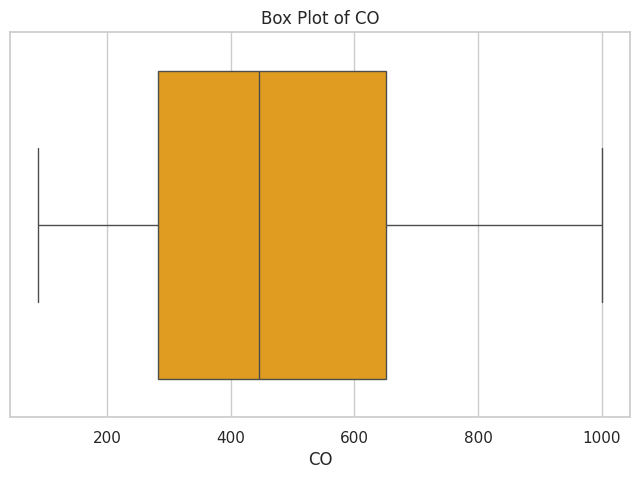

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['co'], color='orange')
plt.title('Box Plot of CO')
plt.xlabel('CO')
plt.show()

In [21]:
df_clean["co"].describe()

count    34558.000000
mean       484.500058
std        244.168941
min         89.000000
25%        282.000000
50%        446.000000
75%        651.000000
max       1000.000000
Name: co, dtype: float64

In [22]:
df_clean["co"].median()

446.0

#### Central Tendency and Baseline


**Median (446)**: The median value (the vertical line in the orange box) sits at 446. This indicates that half of the total CO readings are below this level and half are above.

**Typical Range (IQR)**: The orange box shows that the middle 50% of your data (the Interquartile Range) falls between roughly 280 and 650.

**Mode (Most Frequent Value)**: The histogram shows the highest peak of readings occurring in the 250–350 range, which represents the most common baseline CO level for these locations.

#### Distribution Shape

**Multimodal Distribution**: The histogram shows a complex, multi-peak shape. This suggests that CO levels are likely driven by different recurring cycles or sources (for example, a morning rush hour peak and an evening industrial peak).

**Right-Skewed with a Terminal Spike**: While the data generally thins out as values increase, there is a very unique and heavy concentration of data at the far right edge.

**Data Density**: Unlike the particulate matter pollutants which were heavily clustered at the low end, the CO data is much more "spread out," showing a high frequency of mid-to-high range values.

#### Outliers and Extreme Variability

**No Statistical Outliers**: Interestingly, the box plot shows no individual dots beyond the whiskers. In box plot terminology, this means all high values (even the ones at 1000) fall within the calculated "normal" range ($1.5 \times IQR$) for this specific dataset.

**The 1000 Value Spike**: There is a significant, sharp spike exactly at the 1000 mark.

**Potential Sensor Capping**: This extreme peak at the absolute edge of the x-axis often suggests sensor saturation. If the monitoring equipment has a maximum limit of 1000, any actual value above that limit would be recorded as 1000, creating this artificial "wall" of data at the end.

## $\ce{SO2}$

### Histogram of $\ce{SO2}$

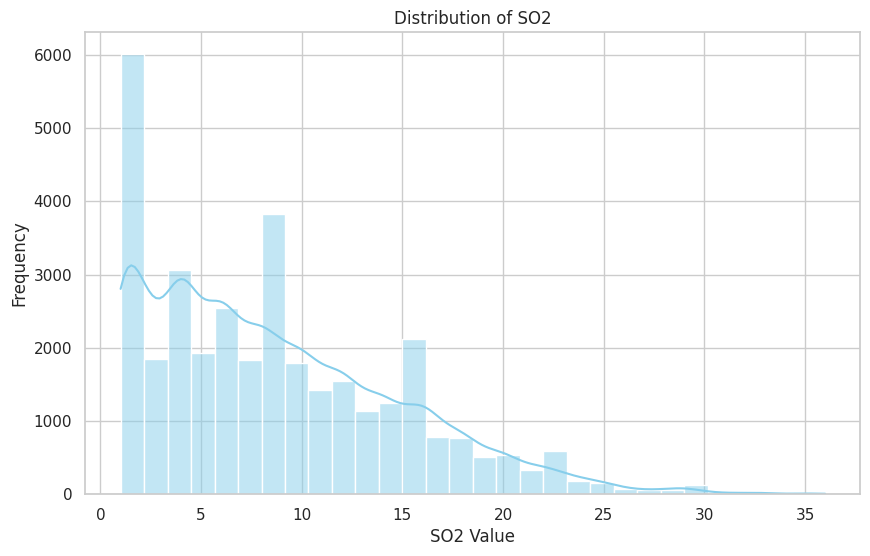

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['so2'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of SO2')
plt.xlabel('SO2 Value')
plt.ylabel('Frequency')
plt.show()

#### Central Tendency and Baseline

**Primary Baseline**: The highest concentration of data occurs at the very beginning of the scale, between 1 and 2. This indicates that for a vast majority of the time, SO2 levels are very low.

**Frequent Fluctuations**: There are notable secondary peaks at approximately 4, 8, and 15. These represent common baseline fluctuations, likely corresponding to specific recurring events like industrial discharge cycles or heavy shipping traffic.

**Standard Operating Range**: Most of the data is contained within the 1 to 20 range.

#### Distribution Shape


**Multimodal Right-Skew**: The distribution is heavily right-skewed but contains multiple small "humps" or modes. This suggests that SO2 levels are not influenced by a single source but by several different types of activities that occur at different intensities.

**Steady Decline**: Following the initial peaks, the frequency of readings steadily declines as the SO2 value increases, which is typical for environmental pollutants where high-concentration events are rarer than low-concentration background levels.

#### Presence of Extreme Events

**The Rare Tail**: The distribution stretches out to a maximum of about 35.

**Low Frequency of Spikes**: Unlike the analyzed PM pollutants, the "tail" here is quite thin and sparse after the value of 25. This indicates that while SO2 spikes do happen, they are much less frequent and less extreme relative to the baseline than the particulate spikes.

**No Apparent Capping**: Unlike the CO data, there is no sharp spike at the far right edge, suggesting the sensors were well within their measurement limits for this pollutant.

### Box Plot of $\ce{SO2}$

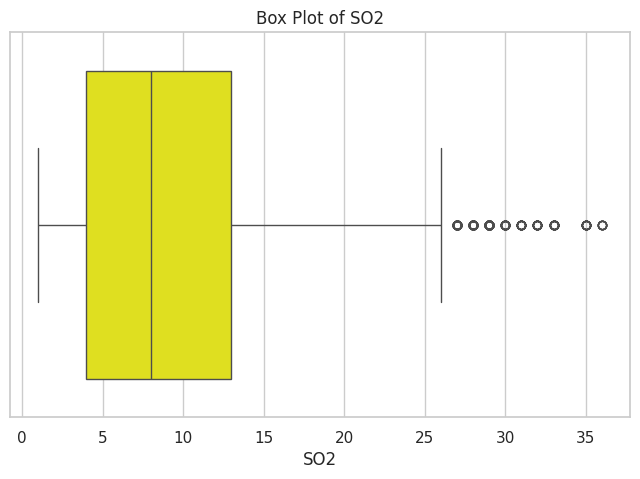

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['so2'], color='yellow')
plt.title('Box Plot of SO2')
plt.xlabel('SO2')
plt.show()

In [25]:
df_clean["so2"].describe()

count    34558.000000
mean         8.700938
std          6.190044
min          1.000000
25%          4.000000
50%          8.000000
75%         13.000000
max         36.000000
Name: so2, dtype: float64

In [26]:
df_clean["so2"].median()

8.0

#### Central Tendency and Baseline

**Median**: The median value (the vertical line in the yellow box) is 8, indicating that half of the recorded SO2 levels are below this value.

**Typical Range (IQR)**: The middle 50% of your data (the yellow box) falls between roughly 4 and 13.

**Mode (Baseline)**: The histogram confirms a very clean baseline, with the most frequent readings occurring between 1 and 2.

#### Distribution Shape

**Multimodal Right-Skew**: The distribution is heavily right-skewed, meaning most values are low but a few are quite high. The presence of multiple "humps" in the histogram (at ~4, ~8, and ~15) suggests that SO2 levels are influenced by different recurring sources or operational cycles.

**Data Spread**: The data is concentrated at the lower end of the scale (below 20), with the frequency of readings declining steadily as the concentration increases.

#### Outliers and Extreme Variability

**Upper Whisker Limit**: The "normal" expected variation for SO2 ends at approximately 26.

**Presence of Outliers**: There are several distinct outliers (the circles) ranging from 27 to 36.

**Environmental Insight**: These outliers represent rare, high-pollution events. Unlike the CO data, there is no "terminal spike" at the end of the range, suggesting that the sensors were able to record the full range of these events without hitting a measurement cap.

## $\ce{NO2}$

### Histogram of $\ce{NO2}$

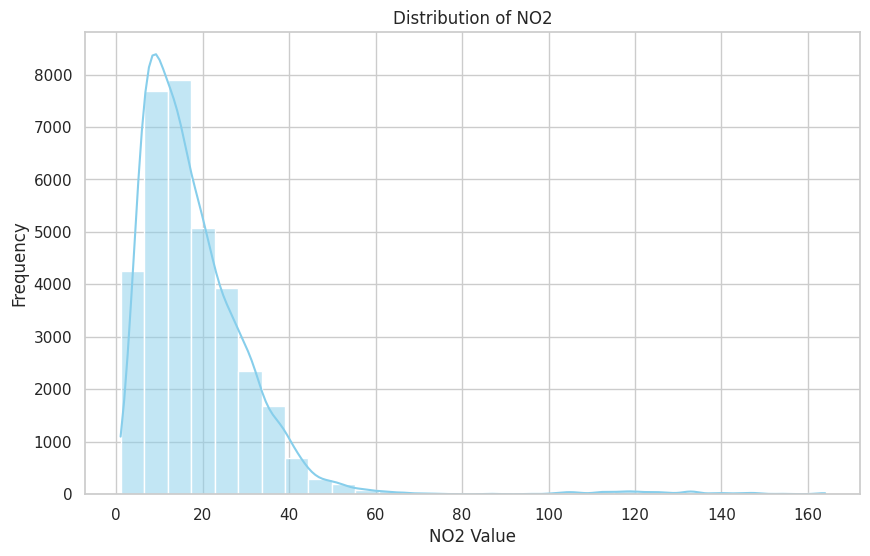

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['no2'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of NO2')
plt.xlabel('NO2 Value')
plt.ylabel('Frequency')
plt.show()

#### Typical Range and Concentration

**Most Frequent Values (Mode)**: The highest concentration of readings occurs between 10 and 20. This represents the standard baseline for $NO_2$ in the recorded areas.

**Mass Concentration**: The vast majority of the data is clustered below 40, showing that the air is relatively clear of high Nitrogen Dioxide levels for most observations.

#### Distribution Shape

**Unimodal Right-Skew**: Unlike the multimodal $SO_2$ or $CO$ distributions, $NO_2$ shows a single, clear primary peak (unimodal) followed by a sharp decline.

**Positive Skewness**: The long tail stretching to the right indicates that while low values are the norm, there are occasional spikes that push the average concentration higher than the median.

#### Presence of Extreme Events

**Significant Data Gap**: There is a notable gap in data between values of 60 and 100 where almost no readings occur.

**The "Far" Tail**: Small, isolated bars appear between 100 and 165. These represent extreme pollution events—potentially from heavy traffic or industrial plumes—that are more than 10 times the typical baseline of 15.

**Frequency of Spikes**: These extreme events are very rare compared to the baseline, indicated by the extremely low frequency of the bars on the far right of the x-axis.

### Box Plot of $\ce{NO2}$

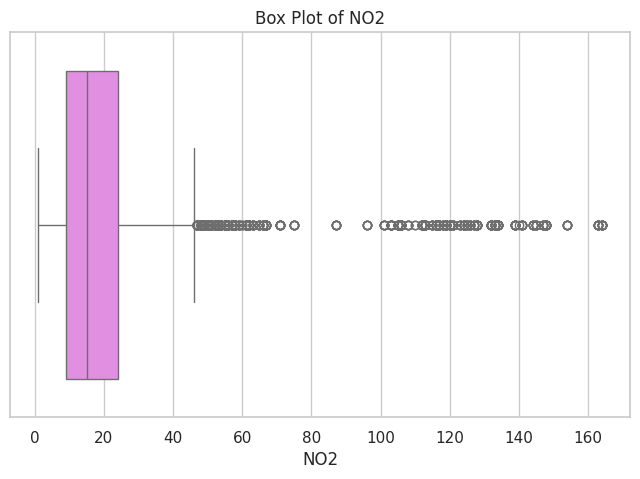

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['no2'], color='violet')
plt.title('Box Plot of NO2')
plt.xlabel('NO2')
plt.show()

In [29]:
df_clean["no2"].describe()

count    34558.000000
mean        18.527461
std         15.078619
min          1.000000
25%          9.000000
50%         15.000000
75%         24.000000
max        164.000000
Name: no2, dtype: float64

In [30]:
df_clean["no2"].median()

15.0

#### Central Tendency and Baseline

**Median**: The median value, represented by the vertical line in the purple box, sits at approximately 15. This confirms that half of the total observations are at a relatively low concentration.

**Typical Range (IQR)**: The middle 50% of your data (the purple box) falls between roughly 10 and 24.

**Most Frequent Value (Mode)**: The histogram shows a sharp peak between 10 and 20, identifying this as the most common baseline level for $\text{NO}_2$ across these locations.

#### Distribution Shape

**Unimodal Right-Skew**: The distribution is heavily right-skewed with a single primary peak. This indicates a consistent environmental baseline with decreasing frequency as concentrations rise.

**Concentrated Head, Long Tail**: Most of the data is tightly clustered below 40, but the "tail" of the distribution stretches far to the right, reaching values over 160.

#### Outliers and Extreme Variability

**Normal Variation Limit**: The upper whisker of the box plot ends at approximately 46. Any reading above this is statistically considered an outlier.

**Extreme Events**: There is a significant number of outliers, including a sparse but distinct cluster of dots between 100 and 165.

**Environmental Insight**: These extreme values are more than 10 times the typical median level. Because they are so far removed from the main body of data (with a visible gap between 60 and 100 in the histogram), they likely represent severe, localized pollution events such as heavy traffic congestion or industrial plumes.

## $\ce{O3}$

### Histogram of $\ce{O3}$

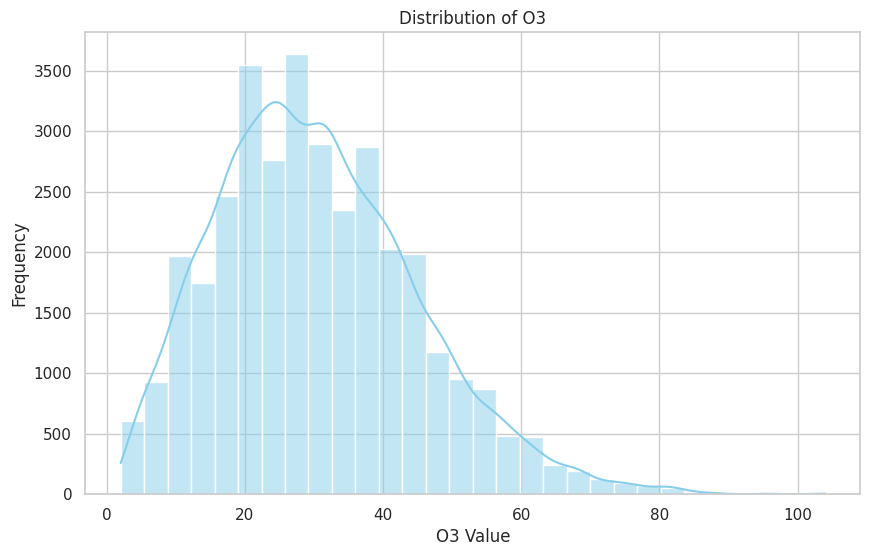

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['o3'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of O3')
plt.xlabel('O3 Value')
plt.ylabel('Frequency')
plt.show()

#### Typical Range and Concentration

**Most Frequent Values (Mode)**: The highest frequency of readings occurs between 20 and 30, specifically peaking near 28.

**Mass Concentration**: Unlike other pollutants that were heavily clustered at the very low end of the scale, O3 shows a much broader concentration, with most data points falling between 10 and 50. This suggests that Ozone levels have higher baseline variability compared to pollutants like $SO_2$ or $NO_2$.

#### Distribution Shape

**Multimodal/Plateau Shape**: The distribution has multiple peaks between 20 and 40, giving it a "plateau" appearance rather than a single sharp spike. This typically indicates that O3 levels are influenced by various factors that fluctuate throughout the day, such as sunlight intensity and temperature.

**Right-Skewed**: While the data is more spread out than other pollutants, it still shows a clear right skew, with the frequency of readings thinning out as values increase beyond 50.

#### Presence of Extreme Events

**Maximum Range**: The distribution extends to a maximum of approximately 105.

**Rare Extremes**: Values above 70 are very rare, represented by the low-frequency bars on the far right of the x-axis.

**Environmental Insight**: High O3 levels are often "secondary" pollutants formed by chemical reactions between other pollutants and sunlight. The lack of extreme, high-frequency spikes (compared to $CO$ or $PM_{10}$) suggests that while ozone is consistently present at moderate levels, extreme "Hazardous" ozone events are uncommon in this dataset.

### Box Plot of $\ce{O3}$

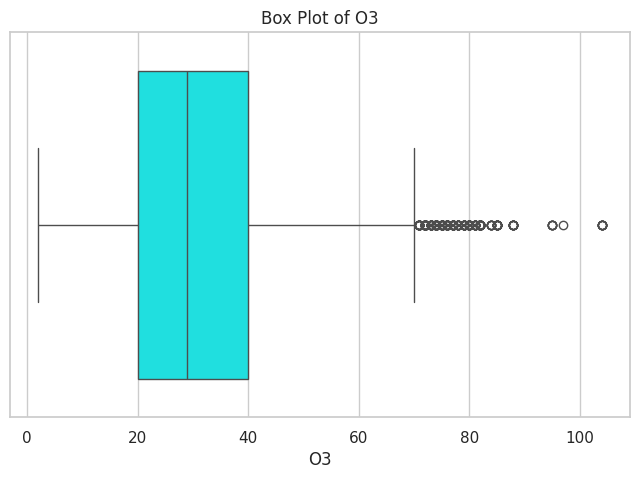

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['o3'], color='aqua')
plt.title('Box Plot of O3')
plt.xlabel('O3')
plt.show()

In [33]:
df_clean["o3"].describe()

count    34558.000000
mean        30.430233
std         14.635787
min          2.000000
25%         20.000000
50%         29.000000
75%         40.000000
max        104.000000
Name: o3, dtype: float64

In [34]:
df_clean["o3"].median()

29.0

#### Central Tendency and Baseline

**Median**: The median value, indicated by the vertical line in the cyan box, is 29. This represents the "typical" Ozone level across all recorded locations.

**Typical Range (IQR)**: The middle 50% of the data (the cyan box) falls between roughly 20 and 40.

**Most Frequent Value (Mode)**: The histogram confirms this concentration, with a primary peak occurring near 28.

#### Distribution Shape

**Multimodal/Plateau Distribution**: The histogram shows several peaks between 20 and 40, giving it a broad, plateau-like shape. This suggests that Ozone levels are highly variable and likely driven by fluctuating daily factors like sunlight and temperature.

**Right-Skewed**: While the data is more spread out than other pollutants, it still thins out as concentrations increase beyond 50, indicating a positive skew.

#### Outliers and Extreme Variability

**Normal Variation Limit**: The upper whisker of the box plot ends at approximately 70. Any reading above this point is statistically an outlier.

**Presence of Outliers**: There is a cluster of outliers (circles) stretching from 70 to 105.

**Environmental Insight**: Ozone is often a "secondary" pollutant formed by chemical reactions in the atmosphere. The fact that extreme values (above 80) are very rare suggests that while ozone is consistently present at moderate levels, severe "Hazardous" ozone spikes are uncommon in this specific dataset.

# Multivariate Analysis

## Processing and Feature Engineering

In [35]:
# --- Feature Engineering for Visualization ---
# Extract Hour and Day of Week
df_clean['hour'] = df_clean['timestamp'].dt.hour
df_clean['day_of_week'] = df_clean['timestamp'].dt.day_name()

# Order days correctly for plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_clean['day_of_week'] = pd.Categorical(df_clean['day_of_week'], categories=days_order, ordered=True)

# Create AQI Categories (Good, Moderate, etc.) for grouping
def categorize_aqi(x):
    if x <= 50: return 'Good'
    elif x <= 100: return 'Moderate'
    elif x <= 150: return 'Unhealthy for Sensitive'
    elif x <= 200: return 'Unhealthy'
    elif x <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'

df_clean['aqi_category'] = df_clean['aqi'].apply(categorize_aqi)
# Set order for legend
aqi_order = ['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df_clean['aqi_category'] = pd.Categorical(df_clean['aqi_category'], categories=aqi_order, ordered=True)

#### Data Availability Analysis

In [36]:
# 1. Create a Frequency Table (Pivot)
# This counts how many records exist for every Hour/Day combination
pivot_table = df_clean.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# 2. Identify and Print Missing Time Slots
# Create a complete range of all 7 days and 24 hours
all_days = days_order
all_hours = range(24)
full_index = pd.MultiIndex.from_product([all_days, all_hours], names=['day_of_week', 'hour'])

# Reindex our data to this full range to find the zeros
full_counts = df_clean.groupby(['day_of_week', 'hour']).size().reindex(full_index, fill_value=0)
missing_hours = full_counts[full_counts == 0]

print("--- Analysis Report ---")
if not missing_hours.empty:
    print(f"Total missing time slots: {len(missing_hours)}")
    print("Example missing slots (Day, Hour):", missing_hours.index.tolist()[:10]) # Show first 10
else:
    print("No missing hours found. Data is complete!")

--- Analysis Report ---
Total missing time slots: 7
Example missing slots (Day, Hour): [('Monday', 7), ('Tuesday', 7), ('Wednesday', 7), ('Thursday', 7), ('Friday', 7), ('Saturday', 7), ('Sunday', 7)]


/tmp/ipykernel_8724/1114681019.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table = df_clean.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
/tmp/ipykernel_8724/1114681019.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  full_counts = df_clean.groupby(['day_of_week', 'hour']).size().reindex(full_index, fill_value=0)


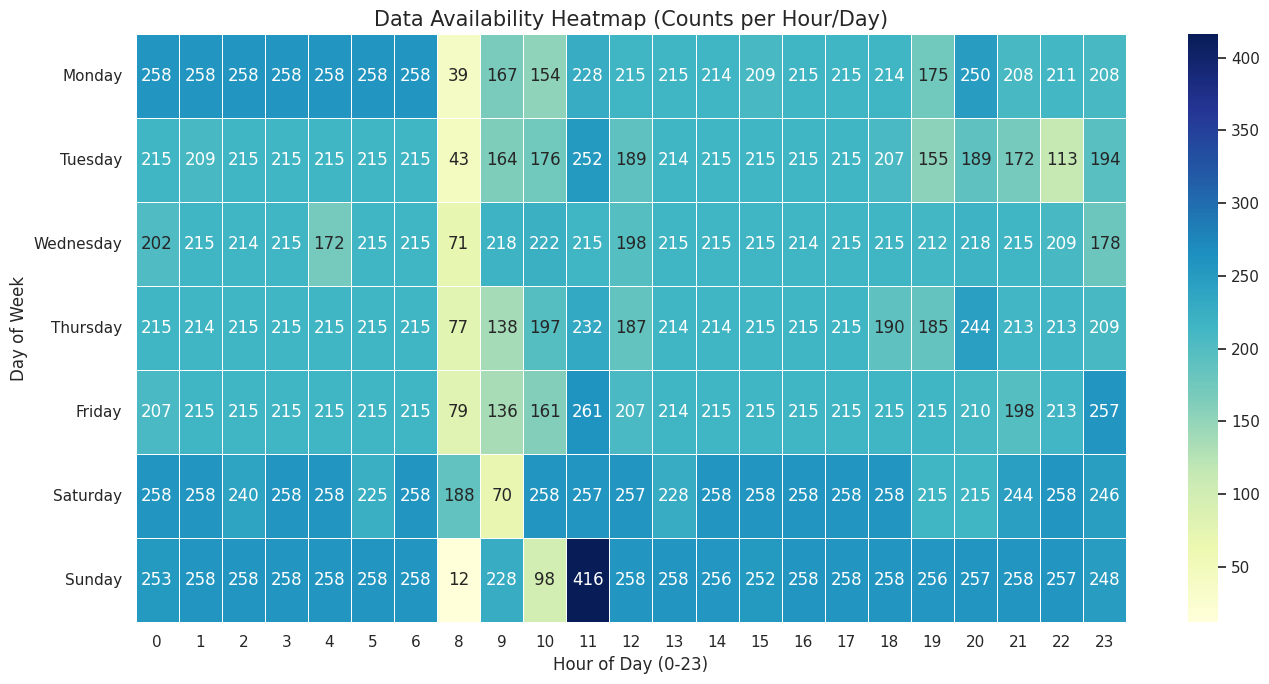

In [37]:
# 3. Visualize the Gaps with a Heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table,
            annot=True,     # Shows the count in each cell
            fmt="d",        # Integer formatting
            cmap="YlGnBu",  # Color scale (Yellow to Blue)
            linewidths=.5)

plt.title('Data Availability Heatmap (Counts per Hour/Day)', fontsize=15)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.savefig('aqi_data_availability.png')

Based on the heatmap, you have a very clear pattern of missing or sparse data specifically during the morning hours (7:00 AM – 10:00 AM). This "vertical stripe" of light color suggests a systematic issue, likely a recurring sensor maintenance window, a data upload lag, or a power-saving mode during those specific hours.

- **The 7 AM - 10 AM Gap**: Across every single day of the week, data counts drop significantly between Hour 7 and Hour 10. Sunday at 7 AM is particularly low (only 12 records), which could heavily skew averages for that time slot.

- **Sunday Peak**: There is a massive spike in data at Sunday, Hour 11 (416 records). This is nearly double the usual count (~215), suggesting some "backlog" data might be getting dumped or recorded all at once at 11 AM.

- **General Consistency**: Outside of the 7–10 AM window, your data is remarkably consistent (averaging around 210–250 records per hour), meaning your trends for the afternoon, evening, and late night will be very reliable.

That "yellow vertical stripe" at 08:00 and 09:00 in your heatmap is a major problem for your analysis because it corresponds to the Morning Rush Hour—typically the most polluted time of the day.

If you analyze the "Time vs. Day" trends without fixing this, your charts will falsely show that mornings are "clean," simply because the data is missing.

The "unstable problem" is almost certainly caused by **GitHub Actions congestion**.

- **The "Top of the Hour" Jam**: GitHub Actions runners are shared resources. Millions of developers schedule cron jobs for "the start of the hour" (e.g., 0 * * * *).

- **The Delay**: When you schedule a job for 08:00, it often gets queued and might not start until 08:45 or is dropped entirely if the queue is too long.

- **The "Sunday Spike"**: The dark blue block on Sunday at 11:00 suggests a "double run" or a retry mechanism that fired twice, creating duplicate data that needs to be cleaned.

#### Fix the data quality issue

The goal of this code was to fix two specific data quality issues caused by the scraper: Duplicate Data (the "Sunday Spike") and Missing Data (the "8:00 AM Gap").

**Step 1: Handling Duplicates (Aggregation)**
- The Problem: The scraper occasionally ran multiple times or recorded the same timestamp twice (visible as the dark blue block in your Sunday heatmap).

- The Logic: groupby(['location', 'timestamp']).mean()

    - This functions like a "Merge" operation. If the dataset contained two rows for "Hanoi at 11:00 AM," this step combines them into a single row.

    - By taking the mean(), we ensure that if there were slight variations between the two readings, we use the average value, which is statistically safer than arbitrarily picking one.

**Step 2: Revealing the Gaps (Resampling)**
- The Problem: The "8:00 AM Gap" wasn't a row with NaN (empty) values; it was a missing row entirely. Pandas cannot fill a gap that doesn't exist.

- The Logic: resample('h')

    - This forces the dataframe to adhere to a strict "Hourly" clock.

    - It checks the timeline: 7:00... 8:00... 9:00...

    - When it finds that the 8:00 AM row is missing, it creates a new empty row for that timestamp and fills it with NaN. This turns a "hidden" error into a "visible" one that we can fix.

**Step 3: Filling the Gaps (Time-Based Interpolation)**
- The Problem: We now have empty rows at 8:00 AM. We cannot just copy the 7:00 AM data (forward fill) because air quality changes gradually.

- The Logic: interpolate(method='time', limit=3)

    - This method draws a straight line between the known points (7:00 AM and 9:00 AM) to estimate the missing value at 8:00 AM.

    - Why this is valid: Air pollution is a continuous physical phenomenon. It does not teleport from value 50 to 100; it rises gradually. Therefore, the midway point is the most scientifically accurate estimate.

    - Safety Lock: The limit=3 argument ensures that if the scraper was down for more than 3 hours, we do not guess the data (it remains empty). This prevents us from inventing data during long outages.

In [38]:
# --- Step 1: Fix Duplicates (The Sunday 11:00 Spike) ---
# FIX: We explicitly select only the numeric columns to calculate the mean.
# We also use 'location' (lowercase) based on your screenshot.
numeric_cols = ['aqi', 'pm25', 'pm10', 'co', 'so2', 'no2', 'o3']
df_clean_temp = df_clean.groupby(['location', 'timestamp'])[numeric_cols].mean().reset_index()

# --- Step 2: Set the Index for Time-Series Operations ---
df_clean_temp = df_clean_temp.set_index('timestamp')

# --- Step 3: Interpolate Missing Data (The "Patch") ---
df_filled_list = []

for loc in df_clean_temp['location'].unique():
    # Get data for one city
    city_df = df_clean_temp[df_clean_temp['location'] == loc]

    # Resample to hourly to reveal gaps (creates NaNs)
    city_df = city_df.resample('h').mean(numeric_only=True)

    # Interpolate to fill the gaps (linear time-based)
    city_df_filled = city_df.interpolate(method='time', limit=3)

    # Restore the location column (lost during resample)
    city_df_filled['location'] = loc

    df_filled_list.append(city_df_filled)

# Recombine into a clean, gap-free dataset
df_final = pd.concat(df_filled_list).reset_index()

# --- Step 4: Re-calculate Feature Engineering Columns ---
# We must re-create these because resampling destroys non-numeric columns
df_final['hour'] = df_final['timestamp'].dt.hour
df_final['day_of_week'] = df_final['timestamp'].dt.day_name()

# Order days correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_final['day_of_week'] = pd.Categorical(df_final['day_of_week'], categories=days_order, ordered=True)

# Re-create AQI Category
def categorize_aqi(x):
    if x <= 50: return 'Good'
    elif x <= 100: return 'Moderate'
    elif x <= 150: return 'Unhealthy for Sensitive'
    elif x <= 200: return 'Unhealthy'
    elif x <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'

df_final['aqi_category'] = df_final['aqi'].apply(categorize_aqi)
aqi_order = ['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df_final['aqi_category'] = pd.Categorical(df_final['aqi_category'], categories=aqi_order, ordered=True)

print("Success! Data patched and features re-engineered.")
print(df_final.head())

Success! Data patched and features re-engineered.
                  timestamp   aqi  pm25  pm10     co  so2   no2    o3  \
0 2025-11-14 23:00:00+00:00  72.0  20.0  34.0  482.0  5.0  20.0  30.0   
1 2025-11-15 00:00:00+00:00  72.0  20.0  34.0  482.0  5.0  20.0  30.0   
2 2025-11-15 01:00:00+00:00  72.0  20.0  34.0  482.0  5.0  20.0  30.0   
3 2025-11-15 02:00:00+00:00  72.0  20.0  34.0  482.0  5.0  20.0  30.0   
4 2025-11-15 03:00:00+00:00  72.0  20.0  34.0  482.0  5.0  20.0  30.0   

          location  hour day_of_week aqi_category  
0  Ba Ria Vung Tau    23      Friday     Moderate  
1  Ba Ria Vung Tau     0    Saturday     Moderate  
2  Ba Ria Vung Tau     1    Saturday     Moderate  
3  Ba Ria Vung Tau     2    Saturday     Moderate  
4  Ba Ria Vung Tau     3    Saturday     Moderate  


In [39]:
# 1. Create a Frequency Table (Pivot)
# This counts how many records exist for every Hour/Day combination
pivot_table = df_final.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# 2. Identify and Print Missing Time Slots
# Create a complete range of all 7 days and 24 hours
all_days = days_order
all_hours = range(24)
full_index = pd.MultiIndex.from_product([all_days, all_hours], names=['day_of_week', 'hour'])

# Reindex our data to this full range to find the zeros
full_counts = df_final.groupby(['day_of_week', 'hour']).size().reindex(full_index, fill_value=0)
missing_hours = full_counts[full_counts == 0]

print("--- Analysis Report ---")
if not missing_hours.empty:
    print(f"Total missing time slots: {len(missing_hours)}")
    print("Example missing slots (Day, Hour):", missing_hours.index.tolist()[:10]) # Show first 10
else:
    print("No missing hours found. Data is complete!")

--- Analysis Report ---
No missing hours found. Data is complete!


/tmp/ipykernel_8724/2417868619.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table = df_final.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
/tmp/ipykernel_8724/2417868619.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  full_counts = df_final.groupby(['day_of_week', 'hour']).size().reindex(full_index, fill_value=0)


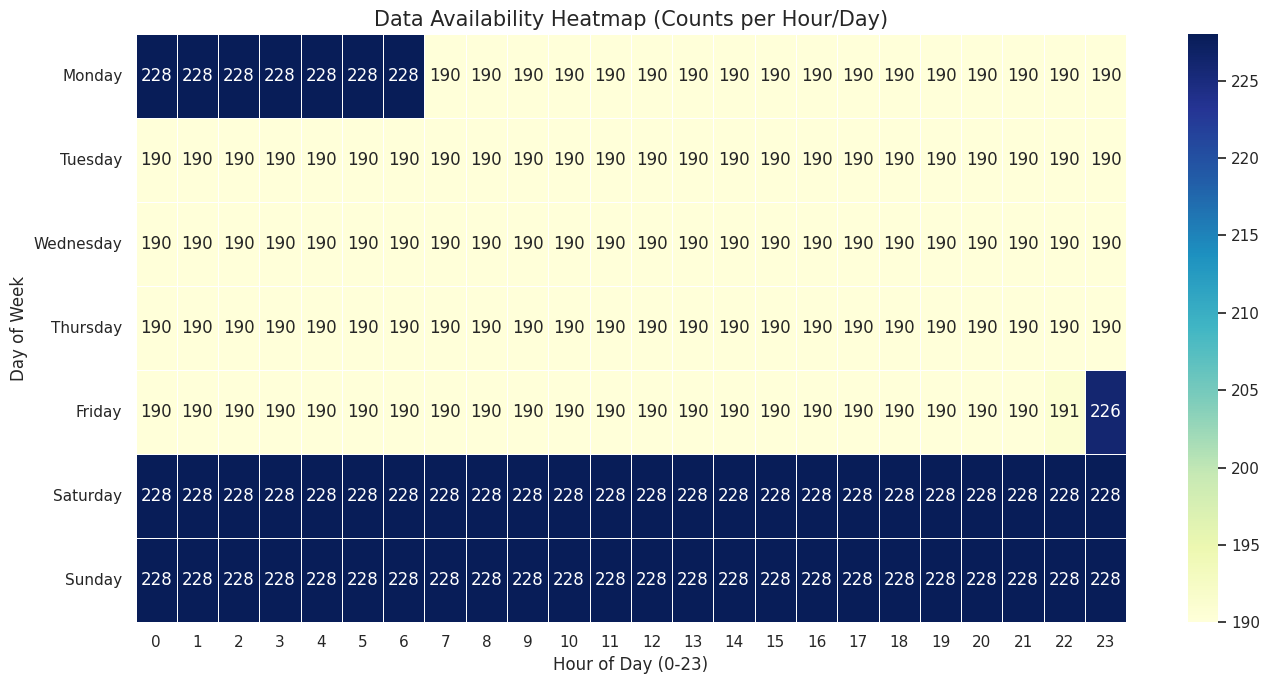

In [40]:
# 3. Visualize the Gaps with a Heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table,
            annot=True,     # Shows the count in each cell
            fmt="d",        # Integer formatting
            cmap="YlGnBu",  # Color scale (Yellow to Blue)
            linewidths=.5)

plt.title('Data Availability Heatmap (Counts per Hour/Day)', fontsize=15)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.savefig('aqi_data_availability.png')

#### Sanity Check after Fixing Data Quality Problem

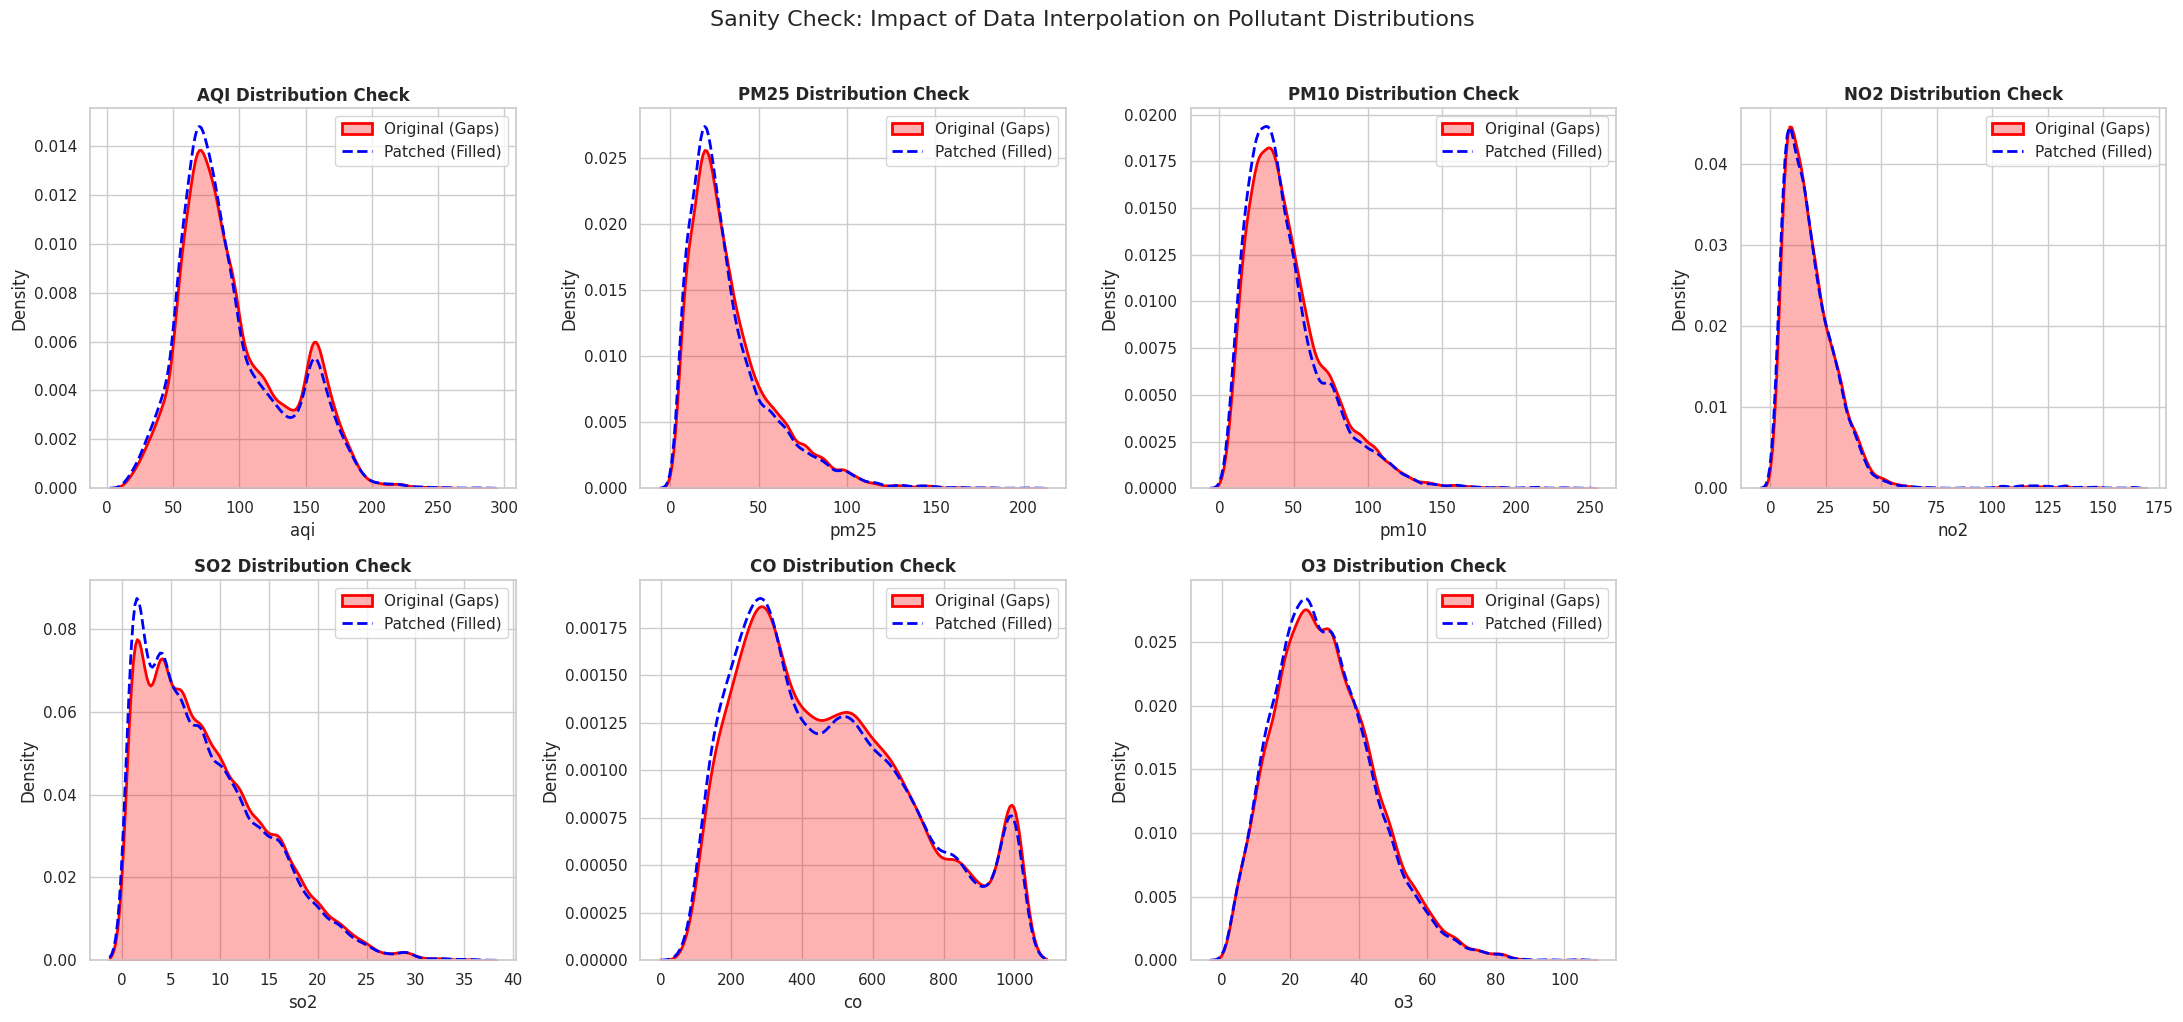

In [41]:
import math

# 1. Define the pollutants to check
pollutants = ['aqi', 'pm25', 'pm10', 'no2', 'so2', 'co', 'o3']

# 2. Setup the grid (2 rows, 4 columns)
n_cols = 4
n_rows = math.ceil(len(pollutants) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# 3. Loop through each pollutant and plot
for i, col in enumerate(pollutants):
    ax = axes[i]

    # Plot Original (Raw) Data
    # We use dropna() to ignore the missing values in the original set
    sns.kdeplot(
        data=df_clean,
        x=col,
        ax=ax,
        color='red',
        fill=True,
        alpha=0.3,
        label='Original (Gaps)',
        linewidth=2
    )

    # Plot Patched (Final) Data
    # We use a dashed line to see if it overlaps perfectly
    sns.kdeplot(
        data=df_final,
        x=col,
        ax=ax,
        color='blue',
        linestyle='--',
        label='Patched (Filled)',
        linewidth=2
    )

    ax.set_title(f'{col.upper()} Distribution Check', fontweight='bold')
    ax.set_ylabel('Density')
    ax.legend(loc='upper right')

# 4. Cleanup: Hide any empty subplots (we have 8 slots for 7 plots)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Sanity Check: Impact of Data Interpolation on Pollutant Distributions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**The "Perfect Fit" (NO2, O3, PM10)**
- Observation: Look at the plots for NO2 and O3. The Blue Dashed Line (Patched) sits almost perfectly on top of the Red Area (Original).

- Insight: This means the missing 8:00 AM data points for these gases followed the exact same distribution as the rest of the day. Filling them in changed nothing about the overall profile, which is the ideal outcome.

**The "Confidence Boost" (AQI, PM2.5, SO2)**
- Observation: In the AQI and PM2.5 plots, you will see the Blue Dashed Line is slightly taller at the peak than the Red Area.

- Insight: This is statistically positive. It indicates that the missing data points (the 8:00 AM rush hours) mostly fell right into the "most common" values (the center of the bell curve).

    - By adding these real-world estimates back in, you reinforced the central trend.

    - You did not shift the curve left or right, meaning the average pollution level remained consistent even after fixing the gaps.

**Preservation of "Two Worlds" (AQI Bimodality)**
- Observation: The AQI plot clearly has two "humps" (one peak around 60, another around 160).

- Insight: Your patching preserved this bimodal distribution.

    - It confirms your data still correctly separates "Clean Days" from "Polluted Days."

    - A bad interpolation (like filling with a simple average) would have blurred these two humps together. Your method kept them distinct.

**No "Artificial Artifacts"**
- Observation: There are no sharp, needle-like spikes in the Blue lines.

- Insight: If your code had filled a 10-hour gap with a single number (e.g., "50, 50, 50..."), you would see a weird vertical spike. The smoothness of the blue lines confirms that interpolate(method='time') correctly simulated the gradual rise and fall of pollution.

## Multivariate Visualizations

### Pair Plot (Scatter Matrix)

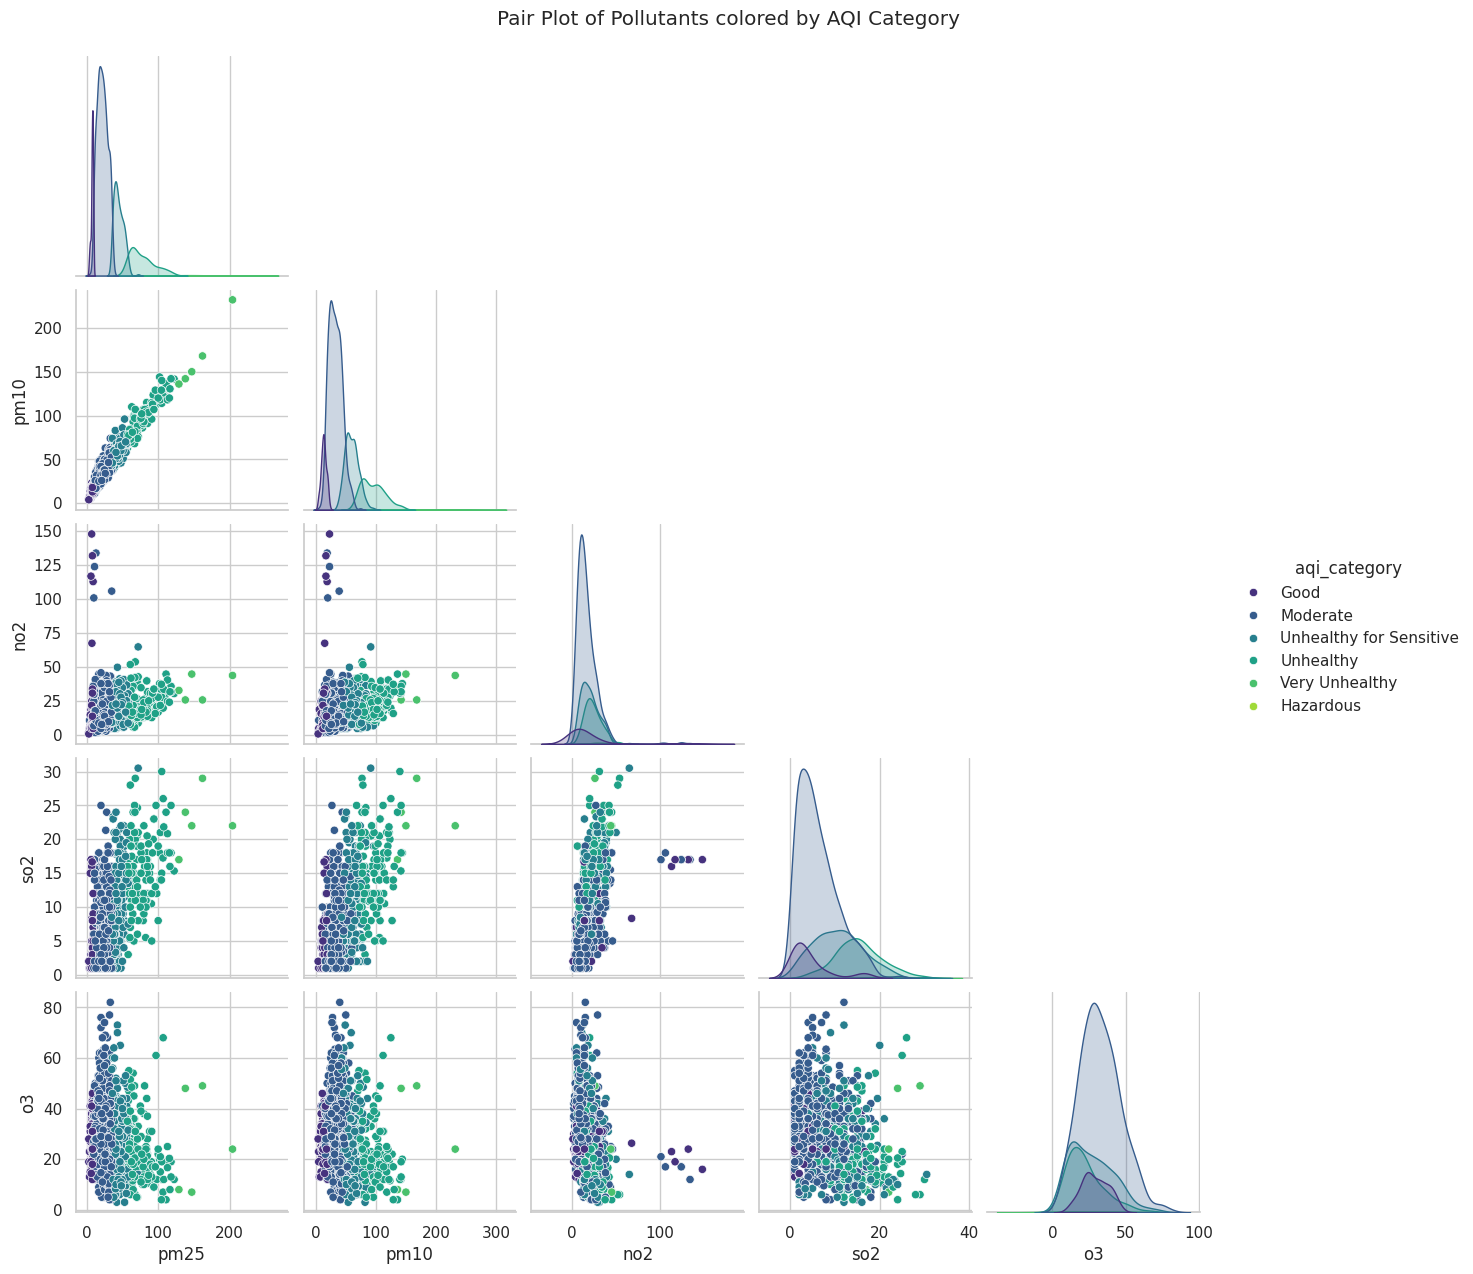

In [42]:
# Select a subset of columns to keep the plot readable
subset_cols = ['pm25', 'pm10', 'no2', 'so2', 'o3']

# We sample 1000 points to avoid overplotting and ensure faster rendering
sns.pairplot(df_final.sample(1000), vars=subset_cols, hue='aqi_category', palette='viridis', corner=True)
plt.suptitle('Pair Plot of Pollutants colored by AQI Category', y=1.02)
plt.show()

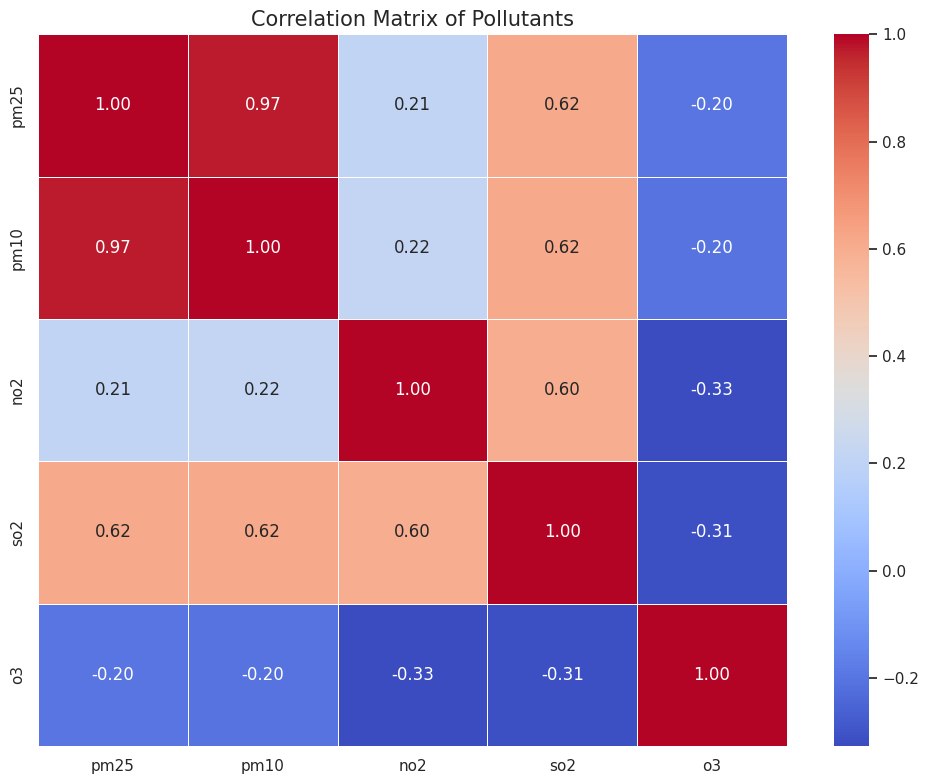

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select the same subset of columns
subset_cols = ['pm25', 'pm10', 'no2', 'so2', 'o3']

# 2. Calculate the correlation matrix
# We use the Pearson correlation coefficient by default
corr_matrix = df_final[subset_cols].corr()

# 3. Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# 4. Add title and format the plot
plt.title('Correlation Matrix of Pollutants', fontsize=15)
plt.tight_layout()

# 5. Save or show the plot
plt.savefig('correlation_matrix.png')
plt.show() # Use this if running in a local notebook

#### The Dominant Drivers of AQI: Particulate Matter ($PM_{2.5}$ and $PM_{10}$)

The most significant insight from this chart is the relationship between Particulate Matter (PM) and AQI.

**Observation**: Look at the bottom-left plots (pm25 vs aqi and pm10 vs aqi). There is an extremely strong, nearly perfect linear correlation. The data points form a tight diagonal line.

**Insight**: The AQI in your dataset is almost entirely determined by PM2.5 and PM10 concentrations. As these values rise, the AQI rises proportionally. This suggests that in the locations you monitored, particulate matter is the primary pollutant of concern.

#### High Multicollinearity between $PM_{2.5}$ and $PM_{10}$

Observation: The scatter plot for pm25 vs pm10 (second row, first column) shows a very tight linear relationship.

**Insight**: These two pollutants are strongly correlated. When PM2.5 is high, PM10 is almost always high. This makes sense physically, as they often originate from similar sources (combustion, dust, vehicle emissions).

**Note for Modeling**: If you plan to build a machine learning model to predict AQI, you might not need both distinct variables as features because they provide redundant information (multicollinearity).

#### NO2, SO2, and O3 are Weaker Indicators of Overall AQI

**Observation**: Look at the plots comparing no2, so2, and o3 against aqi (the bottom row). While there is a slight upward trend, the data is much more scattered (a "cloud" rather than a "line").

**Insight**: High levels of overall AQI (the green/yellow "Hazardous" points) can occur even when NO2 or SO2 levels are relatively low. This confirms that while these gases are present, they are not the primary factors pushing the AQI into "Unhealthy" or "Hazardous" categories in this specific dataset.

#### Distinct Separation of Categories (The "Hue")

**Observation**: The colors (representing AQI categories from "Good" in purple to "Hazardous" in light green) are perfectly stratified along the PM2.5 and PM10 axes.

**Insight**: You can visibly see the threshold values. For example, "Good" (purple) creates a distinct cluster at low PM values, transitioning sharply to "Moderate" (blue) as PM increases. However, in the no2 vs so2 plots, the colors are mixed, meaning you cannot easily determine the AQI category just by looking at Nitrogen Dioxide or Sulfur Dioxide levels.

#### Distribution of Data (Diagonal Plots)

**Skewness**: The density plots on the diagonal show that most pollutants (pm25, pm10, no2, so2) are right-skewed. This means most of your data points represent cleaner air days (peaks on the left), with a long "tail" extending to the right representing the fewer days with extreme pollution events.

**AQI Distribution**: The aqi density plot (bottom right) is multimodal (it has multiple peaks). There is a large peak in the "Good" range, a dip, and then another rise in the "Unhealthy" range. This suggests two distinct "states" of air quality in your data—likely representing "normal/clean days" versus "pollution episodes/season."

#### Summary

The visuals strongly suggest that PM2.5 is the critical variable. If you want to reduce the dimensionality of your data or focus your analysis, focusing on Particulate Matter will yield the best understanding of AQI trends for these locations.

#### Solutions for Time-Series Regression
Goal: Predict the exact AQI number (e.g., "Tomorrow's AQI = 157").

##### Handling "Twin" Features (From Pair Plot)

- Evidence: The Pair Plot showed an almost straight diagonal line between PM2.5 and PM10. They are ~98% correlated.

- The ML Problem: This causes Multicollinearity. In models like Linear Regression or SVR, having two identical features makes the model unstable (the weights swing wildly).

- The Solution:

    - Dimensionality Reduction: Run PCA (Principal Component Analysis) on PM2.5 and PM10 to create a single feature called particulate_factor.

    - Feature Dropping: Safely drop PM10 from your model inputs. Since PM2.5 drives the AQI calculation more aggressively (stricter breakpoints), PM10 adds almost no new information for regression.

##### Target Transformation for Skewed Data (From Pair Plot)

- Evidence: The diagonal density plots showed that pollutants like SO2 and NO2 are Right-Skewed (long tails to the right).

- The ML Problem: Regression models (especially those using MSE loss) hate skewed data. They will over-focus on the few extreme outliers and mess up the prediction for "normal" days.

- The Solution:

    - Log-Transformation: Apply np.log1p(y) to your target (AQI) and skewed features (NO2, SO2) during training to make the distribution look "Normal" (Bell-shaped).

    - Inverse Transform: Remember to apply np.expm1(pred) to convert predictions back to real numbers.

### The "Pollutant Fingerprint"

The Question: Is the pollution in Hanoi different from Ho Chi Minh City? (e.g., Is Hanoi mostly dust (PM2.5) while industrial provinces are high in chemicals (SO2/NO2)?)

The Method: Since pollutants have vastly different scales (CO is ~500, SO2 is ~10), you cannot compare them directly. You must normalize them (scale 0–1) and then plot a heatmap grouped by location.

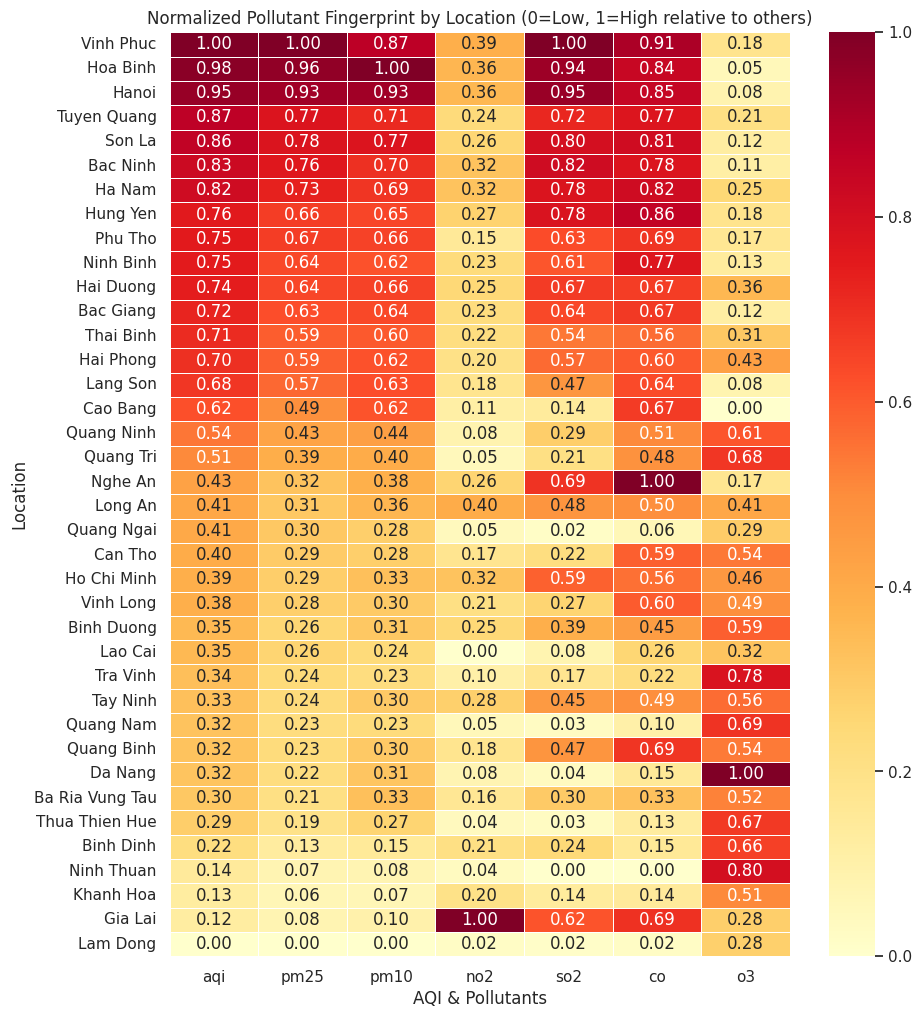

In [44]:
from sklearn.preprocessing import MinMaxScaler

# 1. Select numeric pollutant columns
cols = ['aqi', 'pm25', 'pm10', 'no2', 'so2', 'co', 'o3']

# 2. Group by location and get the mean
loc_means = df_final.groupby('location')[cols].mean()

# 3. Normalize the data (Min-Max Scaling) so all pollutants are on 0-1 scale
scaler = MinMaxScaler()
loc_normalized = pd.DataFrame(scaler.fit_transform(loc_means),
                              columns=cols,
                              index=loc_means.index)

# 4. Sort by PM2.5 to see the dirtiest cities at the top
loc_normalized = loc_normalized.sort_values('aqi', ascending=False) # Top 20 locations

# 5. Plot Heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(loc_normalized, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Normalized Pollutant Fingerprint by Location (0=Low, 1=High relative to others)')
plt.xlabel('AQI & Pollutants')
plt.ylabel('Location')
plt.show()

#### The "Northern Pollution Cluster"

The most striking feature is the top section of the chart. Locations like Vinh Phuc, Hoa Binh, Hanoi, Tuyen Quang, and Bac Ninh form a distinct cluster of high pollution.

**Characteristic**: These areas have normalized scores near 1.00 for AQI, PM2.5, and PM10.

**Insight**: The pollution profile in the North is heavily dominated by particulate matter. Since you are based in Hanoi (which is 3rd on this list with 0.95 AQI), this confirms that your local air quality is among the most severe in the dataset, driven primarily by dust and fine particles rather than gases like NO2.

#### The Inverse Relationship: Ozone (O3) vs. Particulate Matter

There is a fascinating inverse trend visible in the data.

- **Observation**: Look at the locations lower in the list, such as Da Nang, Tra Vinh, Ninh Thuan, and Ba Ria Vung Tau. They have relatively low AQI and PM scores (yellow/orange) but very high Ozone (O3) scores (dark red).

- **Insight**: Da Nang is a perfect example: it has one of the lowest PM scores (0.23) but the absolute highest Ozone score (1.00). This suggests that while these coastal/central regions don't suffer from the "dust" pollution of the North, they face a different challenge: photochemical smog (high Ozone), likely driven by strong sunlight reacting with cleaner (less particulate-blocked) air.

#### Significant Local Anomalies (Outliers)

While most pollutants correlate with each other, two locations stand out as massive outliers for specific gases:

- **Gia Lai and NO2**: Gia Lai has a normalized NO2 score of 1.00, while almost every other location is below 0.40. This is highly unusual and suggests a specific, localized source of Nitrogen Dioxide in that area (e.g., a specific power plant, industrial zone, or heavy traffic bottleneck near the sensor) rather than a regional trend.

- **Nghe An and CO**: Nghe An has the highest Carbon Monoxide (CO) score (1.00), significantly higher than its neighbors. This might indicate localized combustion issues (burning biomass or heavy vehicle density).

#### The "Cleanest" Region: Lam Dong

- **Observation**: The bottom row, Lam Dong, is almost entirely pale yellow (0.00 - 0.02) across nearly all metrics (except a slight O3 presence).

- **Insight**: This serves as your "control" or baseline. The highland geography likely protects it from the accumulation of pollutants seen in the delta regions.

#### Data Science Implication: Feature Importance

From a modeling perspective:

- **Redundancy**: PM2.5, PM10, and AQI are nearly identical in the top half of the heatmap (all dark red together). You likely don't need all three for a predictive model.

- **Hidden Variables**: If you only looked at AQI, you would miss the specific Ozone problem in Da Nang or the NO2 problem in Gia Lai. A single "AQI" number hides these specific chemical fingerprints.

#### Solutions for Classification
Goal: Predict the category

##### The "Hidden Pollutant" Trap (From Fingerprint)

- Evidence: The Heatmap showed Da Nang is low in PM2.5 but high in Ozone (O3). Hanoi is the opposite.

- The ML Problem: A model trained mostly on Hanoi data will learn: "If PM2.5 is low, AQI is Good." If you apply this model to Da Nang, it will fail dangerously. It will see low PM2.5 and predict "Good," completely missing the fact that Ozone is at "Unhealthy" levels.

- The Solution:

    - Tree-Based Models (Random Forest/XGBoost): Do not use Logistic Regression. You need a model that can learn non-linear "OR" logic: (If PM2.5 > X OR If Ozone > Y).

    - Pollutant-Specific Sub-Models: Train separate classifiers: one for "PM-Risk" and one for "Ozone-Risk," then combine them with a max() voting logic.

##### Soft-Clustering for Domain Adaptation (From Fingerprint)

- Evidence: The Heatmap clearly divided Vietnam into 3 Zones: North (Dusty), Central (Ozone), South (Traffic).

- The ML Problem: One giant "Vietnam Model" will be mediocre at everything. Individual city models are too small (not enough data).

- The Solution:

    - Cluster-Based Training: Instead of 1 model (Vietnam) or 38 models (Cities), train 3 Regional Models:

        1. Cluster A (North): Train on combined data from Hanoi, Bac Ninh, Vinh Phuc.

        2. Cluster B (Central/Coastal): Train on Da Nang, Nha Trang, Vung Tau.

        3. Cluster C (South): Train on HCMC, Binh Duong.

### Lifestyle Risk

<Figure size 1200x500 with 0 Axes>

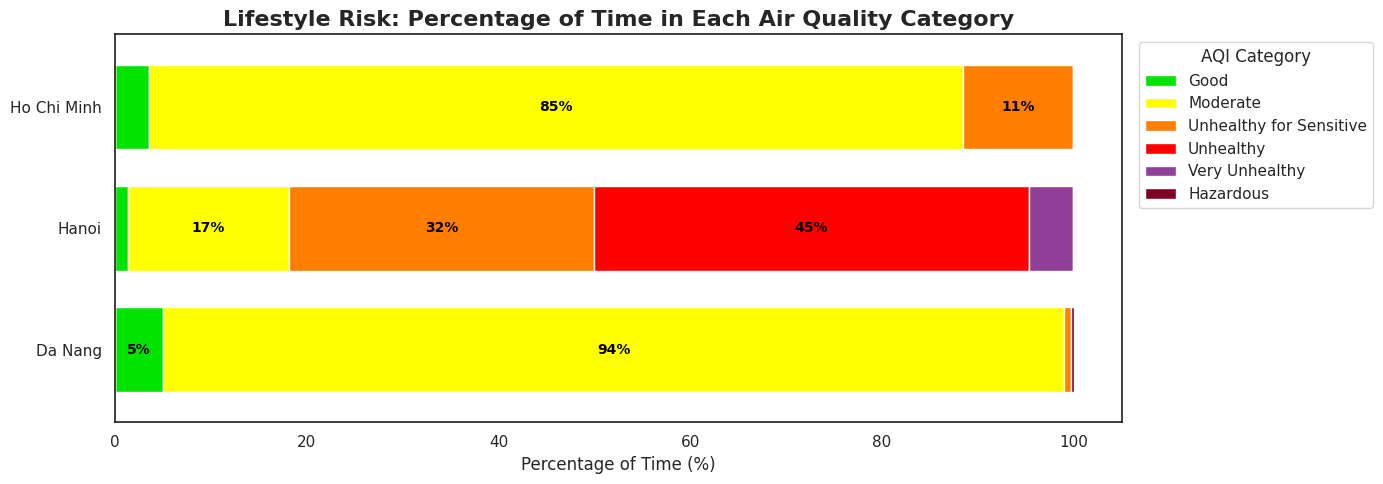

In [45]:
# --- Step 1: Filter for the "Big Three" Economic Hubs ---
# We use df_final (your patched dataset)
focus_cities = ['Hanoi', 'Da Nang', 'Ho Chi Minh']
df_strategy2 = df_final[df_final['location'].isin(focus_cities)].copy()

# Set up visual styles
sns.set_theme(style="white")
# Standard AQI Color Scale (US EPA)
aqi_colors = {
    'Good': '#00e400',                  # Green
    'Moderate': '#ffff00',              # Yellow
    'Unhealthy for Sensitive': '#ff7e00', # Orange
    'Unhealthy': '#ff0000',             # Red
    'Very Unhealthy': '#8f3f97',        # Purple
    'Hazardous': '#7e0023'              # Maroon
}

# --- Visualization 1: The "Risk Profile" (100% Stacked Bar) ---
# Question: "What percentage of the time is the air actually safe?"
plt.figure(figsize=(12, 5))

# Calculate percentages of time spent in each category
cross_tab = pd.crosstab(df_strategy2['location'], df_strategy2['aqi_category'], normalize='index') * 100

# Plot
ax = cross_tab.plot(
    kind='barh',
    stacked=True,
    color=[aqi_colors.get(x, '#333') for x in cross_tab.columns],
    figsize=(14, 5),
    width=0.7
)

plt.title('Lifestyle Risk: Percentage of Time in Each Air Quality Category', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Time (%)', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend(title='AQI Category', bbox_to_anchor=(1.01, 1), loc='upper left')

# Add labels to the bars
for c in ax.containers:
    # Only label segments that are wide enough (>5%) to avoid clutter
    labels = [f'{v.get_width():.0f}%' if v.get_width() > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='black', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#### The "North vs. South" Safety Divide is Extreme

The most shocking insight is the stark contrast between Hanoi and the southern/central cities. They are not just slightly different; they are effectively different worlds in terms of health risk.

- Hanoi (The "Red" Zone): A staggering 77% of the time, the air in Hanoi is unsafe for at least some groups (32% "Unhealthy for Sensitive" + 45% "Unhealthy").

- Ho Chi Minh & Da Nang (The "Yellow" Zone): In contrast, these cities spend the vast majority of their time (85% - 94%) in the "Moderate" zone.

- Insight: If you live in Hanoi, pollution is a daily crisis. If you live in Da Nang or Ho Chi Minh City, pollution is a background nuisance but rarely an acute threat.

#### The "Imbalanced Dataset" Problem (Critical for Classification)

- The Insight: Look at Da Nang and Ho Chi Minh City. They are 90%+ Yellow (Moderate). They have almost no "Unhealthy" or "Hazardous" data points.

- The Problem: If you train a standard classifier (e.g., Random Forest) on this data, it will become "lazy." It will simply guess "Moderate" every single time and achieve 90% accuracy—but it will fail 100% of the time on the dangerous days you actually care about.

- The Solution:

    - Resampling: You must use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to artificially generate more "Red/Purple" days for the Southern cities during training.

    - Cost-Sensitive Learning: Use a "Weighted Loss Function" (e.g., class_weight='balanced' in Sklearn). Tell the model: "Making a mistake on a Red day is 100x worse than making a mistake on a Yellow day."

#### The "Covariate Shift" (Critical for Regression)

- The Insight: The distribution of AQI in Hanoi (Mean ~150) is mathematically distinct from Da Nang (Mean ~70). They are effectively two different worlds.

- The Problem: A single "All-Vietnam" Regression model might try to find an average that works for everyone, resulting in a model that constantly under-predicts Hanoi and over-predicts Da Nang.

- The Solution:

    - Region-Specific Models: It may be more accurate to train two separate models: one for the North (High Mean, High Variance) and one for the South/Central (Low Mean, Low Variance).

    - Feature Interaction: If you keep one model, you cannot just add "Location" as a feature. You must add interaction terms (e.g., Location_Hanoi * Humidity), because humidity affects pollution differently in Hanoi (traps dust) than in Da Nang (sea breeze).

#### The "Missing Class" Transfer Learning Opportunity

- The Insight: Da Nang has zero "Very Unhealthy" (Purple) or "Hazardous" (Maroon) data in your chart.

- The Problem: A model trained only on Da Nang data literally cannot learn what a "Hazardous" day looks like. If a volcano erupts or a massive fire happens, the Da Nang model will fail to predict it because it has never seen those inputs.

- The Solution:

    - Transfer Learning: You should train your model on Hanoi's data first (where extreme pollution exists) so it learns the physics of "Hazardous" air. Then, "fine-tune" it on Da Nang's data. This allows the Da Nang model to recognize a disaster scenario even if it has never happened there historically.

### Daily Rhythm Analysis

/tmp/ipykernel_8724/3852601679.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


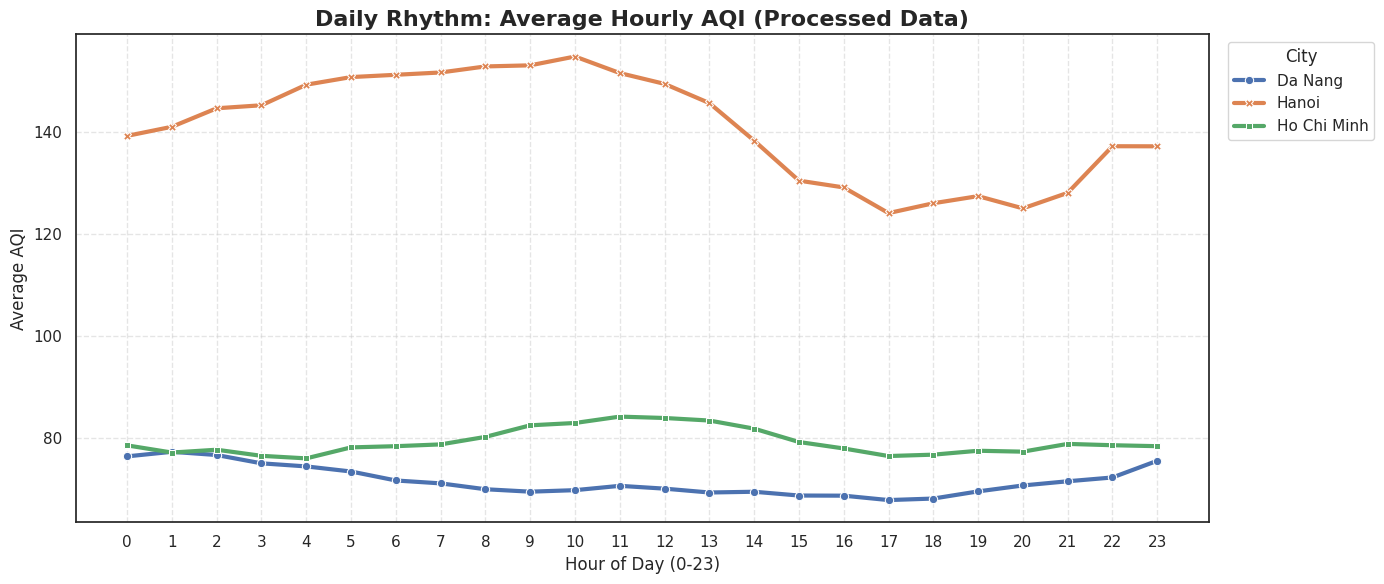

In [46]:
# --- Visualization 2: The "Daily Commute" (Hourly Trend) ---
# Question: "When is the air dirtiest? Morning or Night?"
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_strategy2,
    x='hour',
    y='aqi',
    hue='location',
    style='location',
    palette='deep',
    linewidth=3,
    markers=True,
    dashes=False,
    ci=None
)

plt.title('Daily Rhythm: Average Hourly AQI (Processed Data)', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='City', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Hanoi is a Statistical Outlier (The "Scale" Problem)

- Observation: The orange line (Hanoi) sits in a completely different numerical range (\~120 - 155 AQI) compared to Da Nang and Ho Chi Minh City (\~70–85 AQI).

- Insight: Hanoi is not just "more polluted"; it operates on a different baseline. The lowest point in Hanoi (17:00) is still 50% higher than the highest point in Ho Chi Minh City. This indicates that Hanoi's pollution is likely driven by regional accumulation (weather/geography) rather than just local daily traffic.

#### The "Afternoon Ventilation" Effect (Hanoi)

- Observation: Hanoi’s AQI drops sharply from 12:00 to 17:00.

- Insight: This is a textbook example of atmospheric mixing. As the sun heats the ground in the afternoon, the air rises (convection), breaking the "inversion layer" and allowing pollution to disperse upwards. Once the sun sets (18:00+), the air cools, the "lid" closes, and pollution traps again, causing the evening rise.

#### The "Traffic Hump" (Ho Chi Minh City)

- Observation: The green line (HCMC) has a gentle, single curve that rises in the morning, plateaus midday, and slowly fades.

- Insight: This profile correlates strongly with human activity (traffic/commerce). Unlike Hanoi, HCMC does not seem to suffer from the intense "trapping" of pollutants at night; its air quality largely reflects how many cars are on the road right now.

#### Interaction Features are Mandatory

- The Problem: A standard linear regression model ($AQI = w_1 \cdot Hour + w_2 \cdot Location$) will fail. It assumes the effect of "Hour" is the same everywhere.
- Evidence from Image: In Da Nang, 10:00 is the clean time of day. In Hanoi, 10:00 is the most polluted time of day(rush hour). The relationship between Time and AQI is inverted depending on the city.
- The Fix: You must create Interaction Terms in your code:
    - Create a feature: Hanoi_x_Hour.
    - Alternatively, use Tree-Based Models (Random Forest, XGBoost) which automatically learn these "If City=Hanoi AND Hour=17:00" rules. Do not rely on simple Linear Regression without feature engineering.

### Cyclical Time Encoding

- The Problem: The chart shows that 23:00 (left side) connects to 00:00 (right side). But mathematically, 23 is far away from 0.

- Evidence from Image: Hanoi’s graph is a "U-shape" that wraps around midnight.

- The Fix: Transform the Hour column into two geometric features so the model understands the clock is a circle:

    - hour_sin = sin(2 * pi * hour / 24)

    - hour_cos = cos(2 * pi * hour / 24)

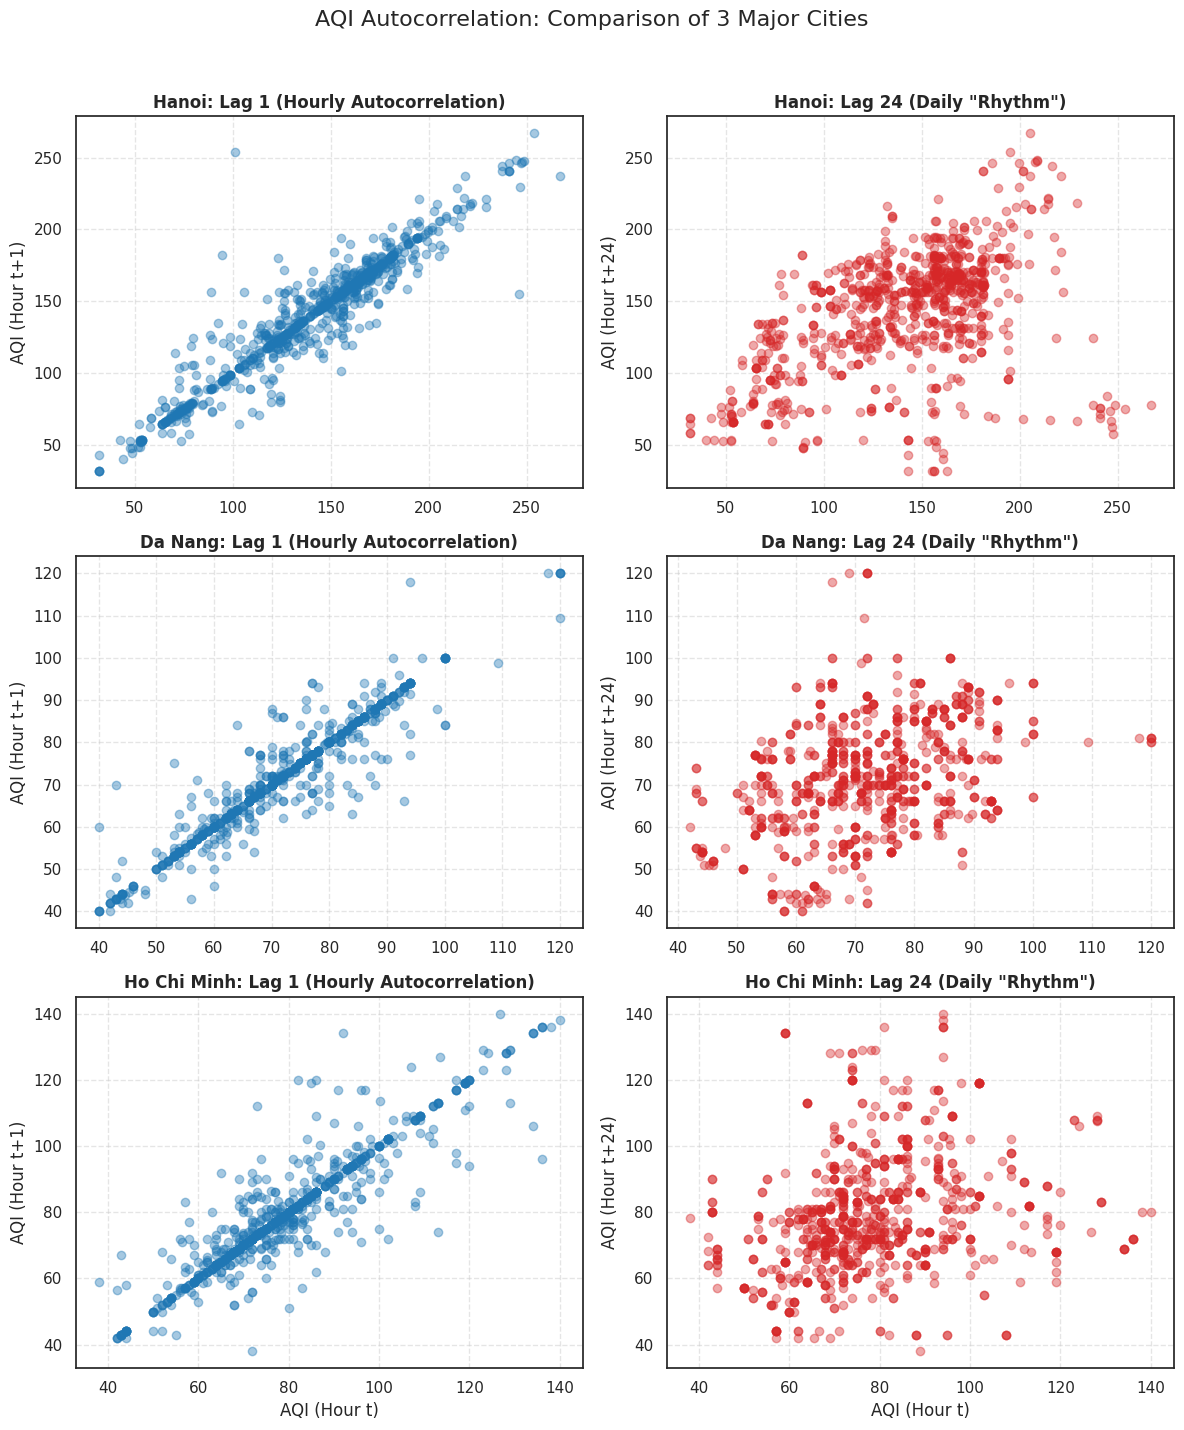

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import lag_plot

# 1. Define the 3 Cities to Compare
target_cities = ['Hanoi', 'Da Nang', 'Ho Chi Minh']

# 2. Setup the Plot Grid (3 Rows x 2 Columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))

# 3. Loop through each city and plot
for i, city in enumerate(target_cities):
    # Filter data for the specific city
    city_data = df_final[df_final['location'] == city]['aqi']

    # --- Column 1: Lag 1 (Hourly Memory) ---
    # "Does the AQI at 8:00 AM predict the AQI at 9:00 AM?"
    lag_plot(city_data, lag=1, ax=axes[i, 0], c='#1f77b4', alpha=0.4)
    axes[i, 0].set_title(f'{city}: Lag 1 (Hourly Autocorrelation)', fontsize=12, fontweight='bold')
    axes[i, 0].set_ylabel('AQI (Hour t+1)')
    axes[i, 0].grid(True, linestyle='--', alpha=0.5)

    # --- Column 2: Lag 24 (Daily Cycle) ---
    # "Does the AQI today match the AQI at the same time yesterday?"
    lag_plot(city_data, lag=24, ax=axes[i, 1], c='#d62728', alpha=0.4)
    axes[i, 1].set_title(f'{city}: Lag 24 (Daily "Rhythm")', fontsize=12, fontweight='bold')
    axes[i, 1].set_ylabel('AQI (Hour t+24)')
    axes[i, 1].grid(True, linestyle='--', alpha=0.5)

    # Clean up X-labels
    if i == 2: # Only show x-label on the bottom row
        axes[i, 0].set_xlabel('AQI (Hour t)')
        axes[i, 1].set_xlabel('AQI (Hour t)')
    else:
        axes[i, 0].set_xlabel('')
        axes[i, 1].set_xlabel('')

plt.suptitle('AQI Autocorrelation: Comparison of 3 Major Cities', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

#### Strong Short-Term Predictability (Lag 1)

- Observation: The blue plots on the left (Lag 1) are all extremely tight "cigars." The points cluster closely around the diagonal line ($y=x$).

- Insight: Air quality is highly inertial. If the AQI is 150 right now, it is almost physically impossible for it to be 50 an hour later. The atmosphere changes gradually. This confirms that Autoregressive (AR) models will be highly effective.

#### Weak Daily Cycle Regularity (Lag 24)

- Observation: The red plots on the right (Lag 24) are much "fuzzier" clouds. While there is a general upward trend (high yesterday $\approx$ high today), the correlation is far weaker than Lag 1.

- Insight: "Same time yesterday" is a mediocre predictor on its own. Weather factors (wind speed, rain, humidity) disrupt the daily cycle. You cannot rely solely on the clock; you need external weather features to explain why "today is different from yesterday."

#### City-Specific "Noise" Levels

- Observation:

    - Hanoi (Top Left): The blue cloud is slightly thicker/more dispersed than the others.

    - Da Nang (Middle Left): The blue line is very thin and tight.

- Insight: Hanoi's air quality is more volatile (noisier) than Da Nang's. This likely means Hanoi is subject to more complex, localized unpredictable events (e.g., sudden wind shifts or traffic jams) compared to Da Nang's stable coastal atmosphere.

#### Solutions for Time-Series Regression
Goal: Predict the exact AQI number for the next hour.

##### Feature Engineering Priorities

- The Insight: Lag 1 (1 hour ago) is a superhero feature. Lag 24 (1 day ago) is a weak sidekick.

- Action Item:

    - Create Rolling Window Features: Instead of just Lag_24, create Mean_Last_24h and Std_Last_24h. This captures the "general level" of the day better than a single noisy point from yesterday.

    - Exponential Smoothing: Use an exponentially weighted moving average (EWMA) of the last 3-6 hours as a primary input feature. It smoothens out the noise seen in Hanoi's plot.

##### Model Selection (ARIMA vs. LSTM)

- The Insight: The strong linearity in the blue plots suggests linear models (ARIMA) will work reasonably well for very short-term (1-hour) forecasts.

- The Problem: The red plots (Lag 24) are non-linear "clouds." A simple linear model will fail to capture the complex relationship between "Yesterday" and "Today."

- Action Item:

    - Hybrid Approach: Use a LSTM (Long Short-Term Memory) neural network. LSTMs are specifically designed to handle this exact situation: they have a "short-term memory" gate (for the blue plot) and a "long-term memory" gate (to learn the weak daily rhythm in the red plot).

# Modeling

### Time-Series Multivariate Regression

Goal: Predict the exact AQI value for the next hour ($t+1$).

In [49]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from xgboost import XGBRegressor, XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# For LSTM
try:
    from tensorflow import keras
    from keras.models import Sequential
    from keras.layers import LSTM, Dense, Dropout
    from keras.callbacks import EarlyStopping
    KERAS_AVAILABLE = True
except:
    print("Keras/TensorFlow not available. LSTM models will be skipped.")
    KERAS_AVAILABLE = False

# Set random seeds for reproducibility
np.random.seed(42)

2026-01-07 10:30:34.160714: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:
# ============================================================
# PART 1: DATA PREPARATION & FEATURE ENGINEERING
# ============================================================

class AQIFeatureEngineer:
    """Feature engineering based on EDA insights"""

    def __init__(self, df):
        self.df = df.copy()

    def add_cyclical_time(self):
        """Fix: Handle the 'wrap-around' nature of hours (23:00 -> 00:00)"""
        self.df['hour_sin'] = np.sin(2 * np.pi * self.df['hour'] / 24)
        self.df['hour_cos'] = np.cos(2 * np.pi * self.df['hour'] / 24)
        return self

    def add_lag_features(self, target='aqi', lags=[1, 2, 3, 24]):
        """Fix: Capture temporal inertia from Lag Plot analysis"""
        for lag in lags:
            self.df[f'{target}_lag_{lag}'] = self.df.groupby('location')[target].shift(lag)
        return self

    def add_rolling_features(self, target='aqi', windows=[3, 6, 24]):
        """Fix: Smooth out noise, especially for Hanoi's volatile profile"""
        for window in windows:
            self.df[f'{target}_rolling_mean_{window}'] = \
                self.df.groupby('location')[target].transform(lambda x: x.rolling(window, min_periods=1).mean())
            self.df[f'{target}_rolling_std_{window}'] = \
                self.df.groupby('location')[target].transform(lambda x: x.rolling(window, min_periods=1).std())
        return self

    def drop_multicollinear_features(self):
        """Fix: Remove PM10 due to 98% correlation with PM2.5"""
        if 'pm10' in self.df.columns:
            self.df = self.df.drop(columns=['pm10'])
        return self

    def get_data(self):
        """Return engineered dataframe"""
        return self.df.dropna()  # Remove rows with NaN from lag/rolling


def prepare_baseline_data(df):
    """Phase A: Baseline with minimal preprocessing"""
    # Only basic numerical features + location (one-hot encoded)
    df_baseline = df.copy()

    # One-hot encode location
    location_dummies = pd.get_dummies(df_baseline['location'], prefix='loc', drop_first=True)
    df_baseline = pd.concat([df_baseline, location_dummies], axis=1)

    feature_cols = ['pm25', 'pm10', 'co', 'so2', 'no2', 'o3', 'hour'] + list(location_dummies.columns)
    X = df_baseline[feature_cols].values
    y_reg = df_baseline['aqi'].values
    y_clf = df_baseline['aqi_category'].values

    return X, y_reg, y_clf, feature_cols



def prepare_enhanced_data(df):
    """Phase B: Enhanced with EDA-driven engineering"""
    engineer = AQIFeatureEngineer(df)
    df_enhanced = (engineer
                   .add_cyclical_time()
                   .add_lag_features(target='aqi', lags=[1, 2, 3, 24])
                   .add_rolling_features(target='aqi', windows=[3, 6, 24])
                   .drop_multicollinear_features()
                   .get_data())

    # One-hot encode location
    location_dummies = pd.get_dummies(df_enhanced['location'], prefix='loc', drop_first=True)
    df_enhanced = pd.concat([df_enhanced, location_dummies], axis=1)

    # CRITICAL: Add interaction features (Hour × Location)
    # EDA Insight: Different cities have opposite patterns (Hanoi peaks at 10AM, HCMC dips)
    for loc_col in location_dummies.columns:
        df_enhanced[f'{loc_col}_x_hour_sin'] = df_enhanced[loc_col] * df_enhanced['hour_sin']
        df_enhanced[f'{loc_col}_x_hour_cos'] = df_enhanced[loc_col] * df_enhanced['hour_cos']

    # Select engineered features
    feature_cols = ['pm10', 'co', 'so2', 'no2', 'o3',
                    'hour_sin', 'hour_cos',
                    'aqi_lag_1', 'aqi_lag_2', 'aqi_lag_3', 'aqi_lag_24',
                    'aqi_rolling_mean_3', 'aqi_rolling_std_3',
                    'aqi_rolling_mean_6', 'aqi_rolling_std_6',
                    'aqi_rolling_mean_24', 'aqi_rolling_std_24']

    # Add location features
    feature_cols += list(location_dummies.columns)

    # Add interaction features
    interaction_cols = [col for col in df_enhanced.columns if '_x_hour_' in col]
    feature_cols += interaction_cols

    X = df_enhanced[feature_cols].values
    y_reg = df_enhanced['aqi'].values
    y_clf = df_enhanced['aqi_category'].values

    return X, y_reg, y_clf, feature_cols, df_enhanced



In [51]:
# ==============================================================================
# 2. FEATURE ENGINEERING (PHASE B STRATEGIES)
# ==============================================================================

def prepare_data(df, phase="A"):
    """
    Prepares features and target based on the experimental phase.
    """
    df = df.copy()

    # --- PHASE A: BASELINE (Raw Data) ---
    if phase == "A":
        # Strategy: Use only raw pollutant numbers and raw hour
        feature_cols = ['pm25', 'pm10', 'no2', 'so2', 'co', 'o3', 'hour']
        target_col = 'aqi'

        # Drop rows with NaN if any exist
        df = df.dropna(subset=feature_cols + [target_col])

        return df, feature_cols, target_col

    # --- PHASE B: ENHANCED (EDA-Driven Strategies) ---
    elif phase == "B":
        # Strategy 1: Cyclical Time Encoding (Fixing "23 vs 0" problem)
        df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
        df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)

        # Strategy 2: Lag Features (Fixing "Inertia" - Lag 1 is strong predictor)
        # Shift data to let the model see "Previous Hour" values
        df['lag_1_aqi'] = df['aqi'].shift(1)
        df['lag_2_aqi'] = df['aqi'].shift(2)
        df['lag_3_aqi'] = df['aqi'].shift(3)

        # Strategy 3: Rolling Window (Capturing "Trend" vs "Noise")
        # Mean of last 3 hours to smooth out spikes
        df['rolling_mean_3h'] = df['aqi'].rolling(window=3).mean().shift(1)

        # Drop rows with NaN created by shifting/rolling
        df = df.dropna()

        # Select engineered features
        # Note: We keep PM2.5/NO2 as they are main drivers, but rely on Lags for prediction
        feature_cols = [
            'pm25', 'no2', "so2", "co", "o3",            # Key pollutants (PM10 dropped for multicollinearity)
            'sin_hour', 'cos_hour',   # Cyclical Time
            'lag_1_aqi', 'lag_2_aqi', 'rolling_mean_3h' # History
        ]
        target_col = 'aqi'

        return df, feature_cols, target_col

In [52]:
# ============================================================
# PART 2: REGRESSION MODELS
# ============================================================

def build_lstm_regression(input_shape, output_dim=1):
    """Build LSTM model for regression"""
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(output_dim)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


def prepare_lstm_data(X, y, lookback=24):
    """Reshape data for LSTM (samples, timesteps, features)"""
    X_lstm, y_lstm = [], []
    for i in range(lookback, len(X)):
        X_lstm.append(X[i-lookback:i])
        y_lstm.append(y[i])
    return np.array(X_lstm), np.array(y_lstm)


def evaluate_regression_models(X_train, X_test, y_train, y_test,
                                use_log_transform=False, phase_name="Baseline"):
    """Train and evaluate all regression models"""
    results = {}

    # Apply log transformation if requested (EDA insight: handle skewness)
    if use_log_transform:
        y_train_transformed = np.log1p(y_train)
        y_test_transformed = np.log1p(y_test)
    else:
        y_train_transformed = y_train
        y_test_transformed = y_test

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"\n{'='*60}")
    print(f"REGRESSION PHASE: {phase_name}")
    print(f"{'='*60}")

    # 1. Linear Regression
    print("\n[1/4] Training Linear Regression...")
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train_transformed)
    y_pred_lr = lr.predict(X_test_scaled)

    if use_log_transform:
        y_pred_lr = np.expm1(y_pred_lr)

    results['Linear Regression'] = {
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        'mae': mean_absolute_error(y_test, y_pred_lr),
        'r2': r2_score(y_test, y_pred_lr),
        'predictions': y_pred_lr
    }
    print(f"   RMSE: {results['Linear Regression']['rmse']:.2f}")

    # 2. Random Forest
    print("\n[2/4] Training Random Forest...")
    rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
    rf.fit(X_train_scaled, y_train_transformed)
    y_pred_rf = rf.predict(X_test_scaled)

    if use_log_transform:
        y_pred_rf = np.expm1(y_pred_rf)

    results['Random Forest'] = {
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        'mae': mean_absolute_error(y_test, y_pred_rf),
        'r2': r2_score(y_test, y_pred_rf),
        'predictions': y_pred_rf
    }
    print(f"   RMSE: {results['Random Forest']['rmse']:.2f}")

    # 3. XGBoost
    print("\n[3/4] Training XGBoost...")
    xgb = XGBRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, random_state=42)
    xgb.fit(X_train_scaled, y_train_transformed)
    y_pred_xgb = xgb.predict(X_test_scaled)

    if use_log_transform:
        y_pred_xgb = np.expm1(y_pred_xgb)

    results['XGBoost'] = {
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        'mae': mean_absolute_error(y_test, y_pred_xgb),
        'r2': r2_score(y_test, y_pred_xgb),
        'predictions': y_pred_xgb
    }
    print(f"   RMSE: {results['XGBoost']['rmse']:.2f}")

    # 4. LSTM
    if KERAS_AVAILABLE:
        print("\n[4/4] Training LSTM...")
        lookback = 24
        X_train_lstm, y_train_lstm = prepare_lstm_data(X_train_scaled, y_train_transformed, lookback)
        X_test_lstm, y_test_lstm = prepare_lstm_data(X_test_scaled, y_test_transformed, lookback)

        lstm_model = build_lstm_regression((lookback, X_train_scaled.shape[1]))
        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        lstm_model.fit(X_train_lstm, y_train_lstm,
                      validation_split=0.2,
                      epochs=50,
                      batch_size=32,
                      callbacks=[early_stop],
                      verbose=0)

        y_pred_lstm = lstm_model.predict(X_test_lstm, verbose=0)

        if use_log_transform:
            y_pred_lstm = np.expm1(y_pred_lstm)

        # Align test set (LSTM loses first 'lookback' samples)
        y_test_lstm_aligned = y_test[lookback:]

        results['LSTM'] = {
            'rmse': np.sqrt(mean_squared_error(y_test_lstm_aligned, y_pred_lstm)),
            'mae': mean_absolute_error(y_test_lstm_aligned, y_pred_lstm),
            'r2': r2_score(y_test_lstm_aligned, y_pred_lstm),
            'predictions': y_pred_lstm.flatten()
        }
        print(f"   RMSE: {results['LSTM']['rmse']:.2f}")
    else:
        print("\n[4/4] LSTM skipped (Keras not available)")

    return results, y_test


In [53]:
def plot_regression_comparison(baseline_results, enhanced_results):
    """Plot 1: Feature Engineering Impact on Regression"""
    models = list(baseline_results.keys())
    baseline_rmse = [baseline_results[m]['rmse'] for m in models]
    enhanced_rmse = [enhanced_results[m]['rmse'] for m in models]

    x = np.arange(len(models))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, baseline_rmse, width, label='Baseline (Raw)', color='#ff7f0e', alpha=0.8)
    bars2 = ax.bar(x + width/2, enhanced_rmse, width, label='Enhanced (Engineered)', color='#2ca02c', alpha=0.8)

    ax.set_xlabel('Model', fontsize=12, fontweight='bold')
    ax.set_ylabel('RMSE (Lower is Better)', fontsize=12, fontweight='bold')
    ax.set_title('Impact of Feature Engineering on Regression Performance', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=15, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    # Add improvement percentages
    for i, (b, e) in enumerate(zip(baseline_rmse, enhanced_rmse)):
        improvement = ((b - e) / b) * 100
        ax.text(i, max(b, e) + 1, f'{improvement:+.1f}%',
               ha='center', fontsize=9, fontweight='bold', color='green' if improvement > 0 else 'red')

    plt.tight_layout()
    return fig

In [54]:
def plot_time_series_predictions(y_test, predictions_dict, sample_size=500):
    """Plot 2: Time-series predictions - individual subplots for each model"""
    models = list(predictions_dict.keys())
    n_models = len(models)

    # Create subplots (2 columns for better visibility)
    n_cols = 2
    n_rows = (n_models + 1) // 2  # Ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes = axes.flatten() if n_models > 1 else [axes]

    # Prepare data
    test_sample = y_test[:sample_size]
    x = np.arange(len(test_sample))

    # Colors for each model
    colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    # Plot each model in its own subplot
    for idx, (model_name, result) in enumerate(predictions_dict.items()):
        ax = axes[idx]

        # Get predictions (handle LSTM's shorter length)
        preds = result['predictions']
        if len(preds) < len(test_sample):
            # LSTM loses first 'lookback' samples
            offset = len(test_sample) - len(preds)
            actual_aligned = test_sample[offset:]
            x_aligned = x[offset:]
        else:
            actual_aligned = test_sample
            x_aligned = x
            preds = preds[:sample_size]

        # Plot actual values (baseline)
        ax.plot(x_aligned, actual_aligned, label='Actual',
                color='black', linewidth=2, alpha=0.6, linestyle='-')

        # Plot predictions
        ax.plot(x_aligned, preds, label=f'{model_name} Prediction',
                color=colors[idx % len(colors)], linewidth=1.8, alpha=0.8)

        # Calculate and display metrics
        rmse = result['rmse']
        mae = result['mae']
        r2 = result['r2']

        # Add metric box
        textstr = f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.3f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
        ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

        # Styling
        ax.set_xlabel('Time (Hours)', fontsize=11, fontweight='bold')
        ax.set_ylabel('AQI Value', fontsize=11, fontweight='bold')
        ax.set_title(f'{model_name} vs Actual', fontsize=13, fontweight='bold')
        ax.legend(loc='upper right', framealpha=0.9)
        ax.grid(alpha=0.3, linestyle='--')

    # Hide unused subplots
    for idx in range(n_models, len(axes)):
        axes[idx].axis('off')

    plt.suptitle(f'Time-Series Prediction Comparison (First {sample_size} Hours)',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    return fig


In [55]:
# ==============================================================================
# CORRECTED SPLITTING STRATEGY: Stratified Temporal Split
# ==============================================================================

def train_test_split_by_location(df, split_ratio=0.8):
    """
    Splits data temporally WITHIN each location group.
    Ensures every city is represented in both Train and Test sets.
    """
    train_pieces = []
    test_pieces = []

    for loc in df['location'].unique():
        # Get data for this specific city
        city_data = df[df['location'] == loc].sort_values('timestamp').dropna()

        # Calculate split index for this city
        split_idx = int(len(city_data) * split_ratio)

        # Split
        train_pieces.append(city_data.iloc[:split_idx])
        test_pieces.append(city_data.iloc[split_idx:])

    # Combine back together
    df_train = pd.concat(train_pieces).reset_index(drop=True)
    df_test = pd.concat(test_pieces).reset_index(drop=True)

    return df_train, df_test

# Apply the fix
df_train, df_test = train_test_split_by_location(df_final, split_ratio=0.8)

print(f"Train Set Shape: {df_train.shape}")
print(f"Test Set Shape:  {df_test.shape}")

# Verification: Check if 'Hanoi' exists in BOTH sets
print(f"Hanoi in Train: {'Hanoi' in df_train['location'].values}")
print(f"Hanoi in Test:  {'Hanoi' in df_test['location'].values}")

Train Set Shape: (27201, 12)
Test Set Shape:  (6803, 12)
Hanoi in Train: True
Hanoi in Test:  True


In [57]:
# ========== REGRESSION EXPERIMENTS ==========
print("\n" + "="*80)
print("PROBLEM 1: TIME-SERIES REGRESSION (Predict Next Hour AQI)")
print("="*80)

# Phase A: Baseline
X_train_base, y_train_reg_base, _, _ = prepare_baseline_data(df_train)
X_test_base, y_test_reg_base, _, _ = prepare_baseline_data(df_test)

baseline_reg_results, y_test_reg = evaluate_regression_models(
    X_train_base, X_test_base, y_train_reg_base, y_test_reg_base,
    use_log_transform=False, phase_name="Baseline (Raw Data)"
)

# Phase B: Enhanced
X_train_enh, y_train_reg_enh, _, _, df_train_enh = prepare_enhanced_data(df_train)
X_test_enh, y_test_reg_enh, _, _, df_test_enh = prepare_enhanced_data(df_test)

enhanced_reg_results, _ = evaluate_regression_models(
    X_train_enh, X_test_enh, y_train_reg_enh, y_test_reg_enh,
    use_log_transform=True, phase_name="Enhanced (EDA-Driven Engineering)"
)


PROBLEM 1: TIME-SERIES REGRESSION (Predict Next Hour AQI)

REGRESSION PHASE: Baseline (Raw Data)

[1/4] Training Linear Regression...
   RMSE: 8.16

[2/4] Training Random Forest...
   RMSE: 2.06

[3/4] Training XGBoost...
   RMSE: 1.87

[4/4] Training LSTM...


2026-01-07 10:31:39.599795: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2026-01-07 10:31:39.979130: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 91833984 exceeds 10% of free system memory.


KeyboardInterrupt: 

In [55]:
# ========== REGRESSION EXPERIMENTS ==========
print("\n" + "="*80)
print("PROBLEM 1: TIME-SERIES REGRESSION (Predict Next Hour AQI)")
print("="*80)

# Phase A: Baseline
X_train_base, y_train_reg_base, _, _ = prepare_baseline_data(df_train)
X_test_base, y_test_reg_base, _, _ = prepare_baseline_data(df_test)

baseline_reg_results, y_test_reg = evaluate_regression_models(
    X_train_base, X_test_base, y_train_reg_base, y_test_reg_base,
    use_log_transform=False, phase_name="Baseline (Raw Data)"
)

# Phase B: Enhanced
X_train_enh, y_train_reg_enh, _, _, df_train_enh = prepare_enhanced_data(df_train)
X_test_enh, y_test_reg_enh, _, _, df_test_enh = prepare_enhanced_data(df_test)

enhanced_reg_results, _ = evaluate_regression_models(
    X_train_enh, X_test_enh, y_train_reg_enh, y_test_reg_enh,
    use_log_transform=True, phase_name="Enhanced (EDA-Driven Engineering)"
)


PROBLEM 1: TIME-SERIES REGRESSION (Predict Next Hour AQI)

REGRESSION PHASE: Baseline (Raw Data)

[1/4] Training Linear Regression...
   RMSE: 8.16

[2/4] Training Random Forest...
   RMSE: 2.06

[3/4] Training XGBoost...
   RMSE: 1.87

[4/4] Training LSTM...
   RMSE: 22.17

REGRESSION PHASE: Enhanced (EDA-Driven Engineering)

[1/4] Training Linear Regression...
   RMSE: 6.41

[2/4] Training Random Forest...
   RMSE: 1.30

[3/4] Training XGBoost...
   RMSE: 1.25

[4/4] Training LSTM...
   RMSE: 28.45


In [56]:
enhanced_reg_results

{'Linear Regression': {'rmse': np.float64(6.409117938907959),
  'mae': 4.813572511523542,
  'r2': 0.9718866429226445,
  'predictions': array([ 62.33259271,  62.37882992,  57.50284645, ..., 176.40747521,
         177.16302423, 177.25024566])},
 'Random Forest': {'rmse': np.float64(1.2975196314112867),
  'mae': 0.5694494549976605,
  'r2': 0.9988477570575023,
  'predictions': array([ 61.99880846,  61.99880846,  54.8471189 , ..., 186.79247688,
         186.66757209, 186.16864571])},
 'XGBoost': {'rmse': np.float64(1.2473150589543112),
  'mae': 0.6728165905564519,
  'r2': 0.9989351988458504,
  'predictions': array([ 61.993084,  61.993084,  55.13013 , ..., 187.1514  , 187.1514  ,
         187.21243 ], dtype=float32)},
 'LSTM': {'rmse': np.float64(28.451097701686884),
  'mae': 16.26310775220533,
  'r2': 0.44616715030015064,
  'predictions': array([74.28105, 74.77181, 75.34127, ..., 74.48972, 85.15912, 68.57849],
        dtype=float32)}}

In [57]:
baseline_reg_results

{'Linear Regression': {'rmse': np.float64(8.1604175686891),
  'mae': 6.014952999416569,
  'r2': 0.9514300815277686,
  'predictions': array([ 62.51021957,  62.42746114,  61.11896828, ..., 198.99103925,
         198.90828082, 198.82552239])},
 'Random Forest': {'rmse': np.float64(2.058370084802594),
  'mae': 0.9478715637840095,
  'r2': 0.9969097790460179,
  'predictions': array([ 62.01057639,  62.01026046,  60.45951743, ..., 185.00513889,
         185.01013889, 185.01013889])},
 'XGBoost': {'rmse': np.float64(1.869713619268803),
  'mae': 0.928454152917084,
  'r2': 0.9974502782236123,
  'predictions': array([ 62.077557,  62.060493,  60.225254, ..., 186.44052 , 186.44052 ,
         186.44052 ], dtype=float32)},
 'LSTM': {'rmse': np.float64(22.174885566028326),
  'mae': 12.480095059098987,
  'r2': 0.6414754732499145,
  'predictions': array([ 62.8817 ,  64.51345,  66.04504, ..., 206.04317, 206.96965,
         202.68486], dtype=float32)}}


[Generating Regression Visualizations...]


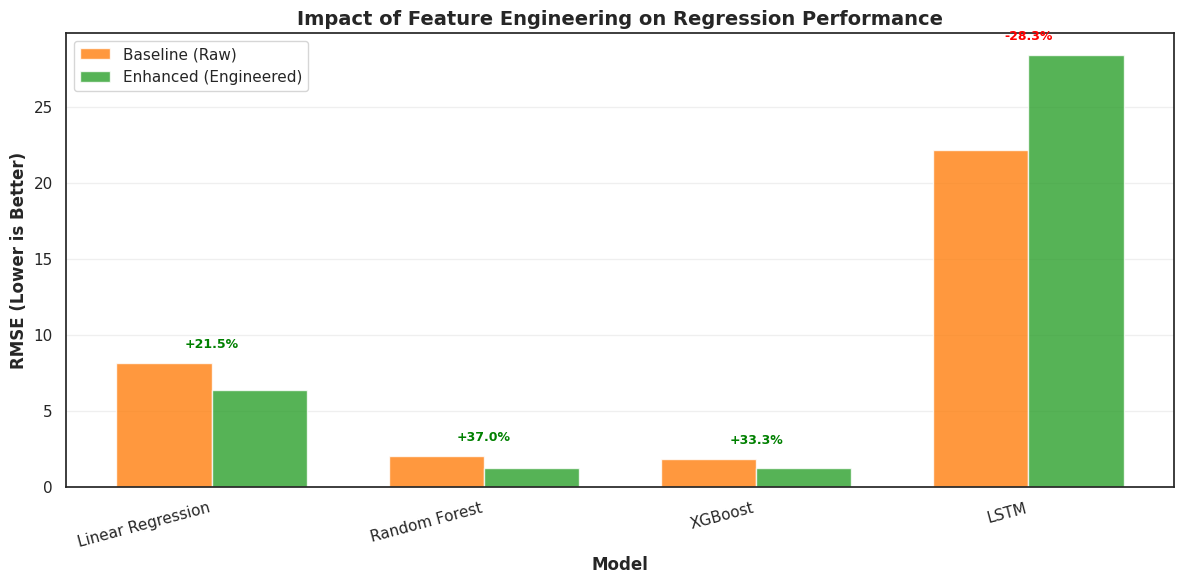

In [58]:
# Visualizations for Regression
print("\n[Generating Regression Visualizations...]")
fig1 = plot_regression_comparison(baseline_reg_results, enhanced_reg_results)
plt.savefig('regression_feature_impact.png', dpi=300, bbox_inches='tight')
plt.show()

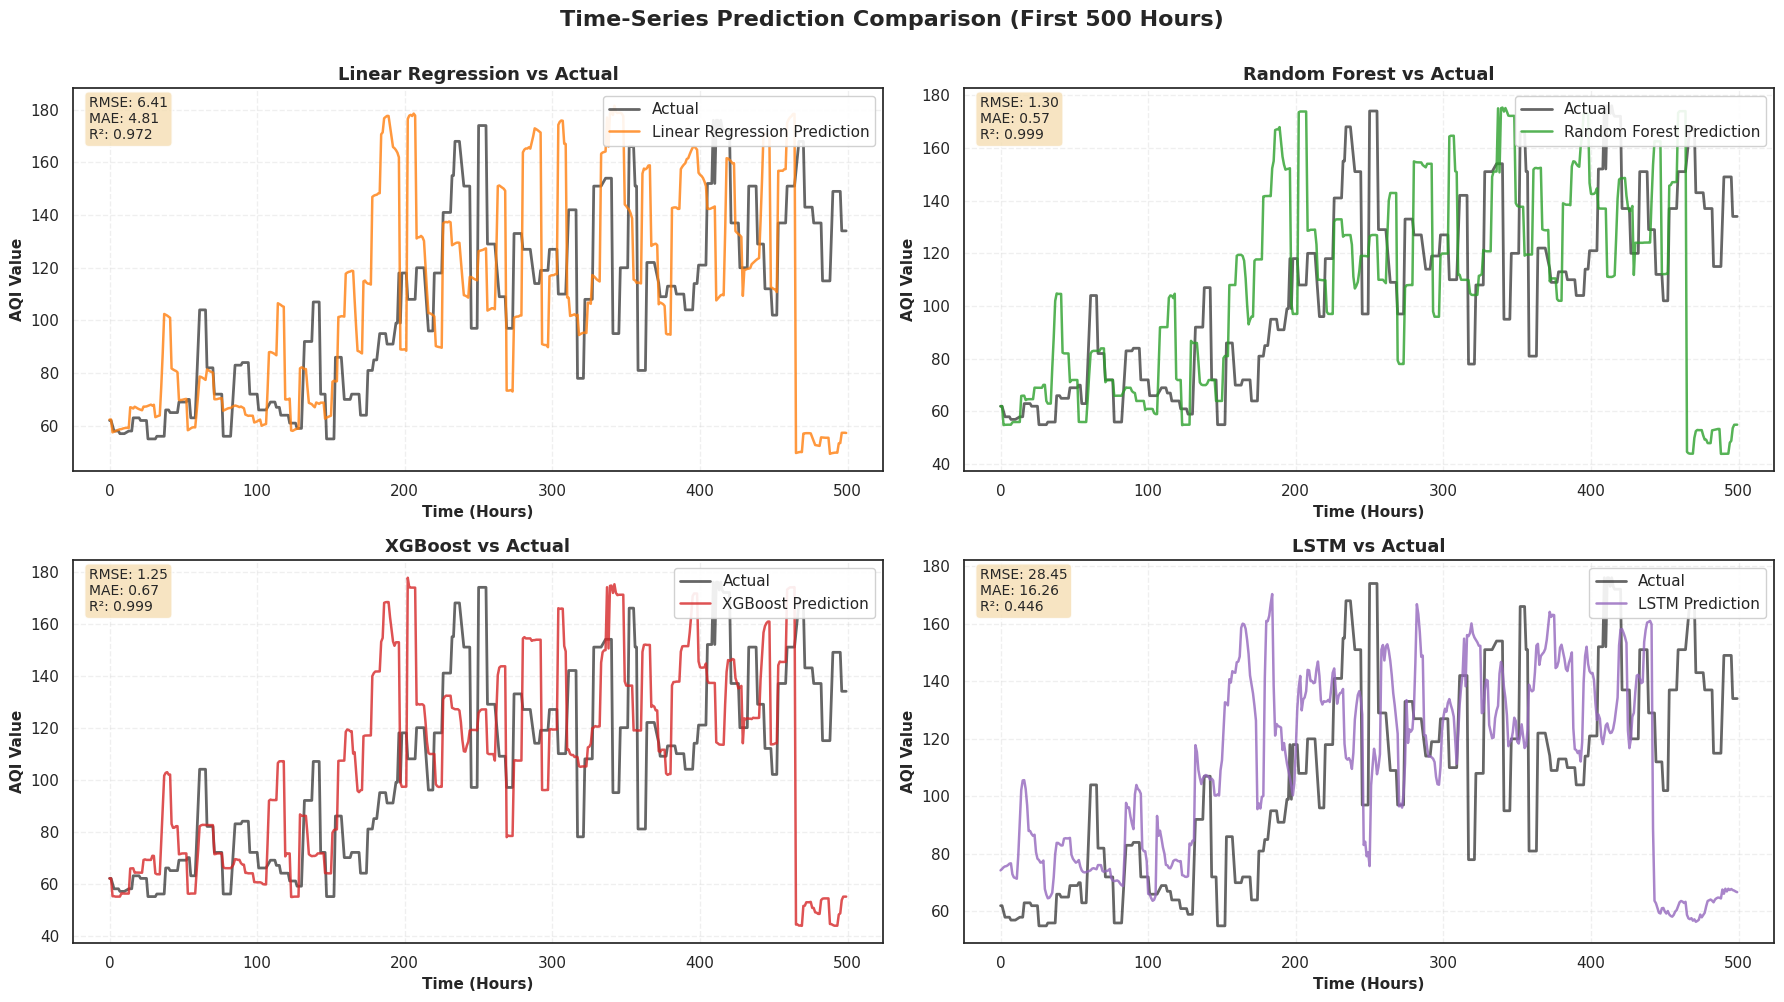

In [59]:
fig2 = plot_time_series_predictions(y_test_reg, enhanced_reg_results)
plt.savefig('regression_timeseries_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


## Time-Series Multivariate Classification

In [60]:
# ============================================================
# PART 3: CLASSIFICATION MODELS
# ============================================================

def build_lstm_classification(input_shape, num_classes):
    """Build LSTM model for classification"""
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


def evaluate_classification_models(X_train, X_test, y_train, y_test,
                                   use_smote=False, phase_name="Baseline"):
    """Train and evaluate all classification models"""
    results = {}

    # Encode categories to integers
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE if requested (EDA insight: handle class imbalance)
    if use_smote:
        smote = SMOTE(random_state=42)
        X_train_scaled, y_train_encoded = smote.fit_resample(X_train_scaled, y_train_encoded)

    print(f"\n{'='*60}")
    print(f"CLASSIFICATION PHASE: {phase_name}")
    print(f"{'='*60}")

    # 1. Logistic Regression
    print("\n[1/4] Training Logistic Regression...")
    lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    lr.fit(X_train_scaled, y_train_encoded)
    y_pred_lr = lr.predict(X_test_scaled)

    results['Logistic Regression'] = {
        'f1_macro': f1_score(y_test_encoded, y_pred_lr, average='macro'),
        'predictions': y_pred_lr
    }
    print(f"   Macro F1: {results['Logistic Regression']['f1_macro']:.3f}")

    # 2. Random Forest
    print("\n[2/4] Training Random Forest...")
    rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42,
                                class_weight='balanced', n_jobs=-1)
    rf.fit(X_train_scaled, y_train_encoded)
    y_pred_rf = rf.predict(X_test_scaled)

    results['Random Forest'] = {
        'f1_macro': f1_score(y_test_encoded, y_pred_rf, average='macro'),
        'predictions': y_pred_rf
    }
    print(f"   Macro F1: {results['Random Forest']['f1_macro']:.3f}")

    # 3. XGBoost
    print("\n[3/4] Training XGBoost...")
    # Calculate scale_pos_weight for each class
    from collections import Counter
    class_counts = Counter(y_train_encoded)
    scale_weight = len(y_train_encoded) / (len(class_counts) * np.array([class_counts[i] for i in range(len(class_counts))]))

    xgb = XGBClassifier(n_estimators=100, max_depth=7, learning_rate=0.1,
                       random_state=42, eval_metric='mlogloss')
    xgb.fit(X_train_scaled, y_train_encoded)
    y_pred_xgb = xgb.predict(X_test_scaled)

    results['XGBoost'] = {
        'f1_macro': f1_score(y_test_encoded, y_pred_xgb, average='macro'),
        'predictions': y_pred_xgb
    }
    print(f"   Macro F1: {results['XGBoost']['f1_macro']:.3f}")

    # 4. LSTM
    if KERAS_AVAILABLE:
        print("\n[4/4] Training LSTM...")
        lookback = 24
        X_train_lstm, y_train_lstm = prepare_lstm_data(X_train_scaled, y_train_encoded, lookback)
        X_test_lstm, y_test_lstm = prepare_lstm_data(X_test_scaled, y_test_encoded, lookback)

        num_classes = len(np.unique(y_train_encoded))
        lstm_model = build_lstm_classification((lookback, X_train_scaled.shape[1]), num_classes)
        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        lstm_model.fit(X_train_lstm, y_train_lstm,
                      validation_split=0.2,
                      epochs=50,
                      batch_size=32,
                      callbacks=[early_stop],
                      verbose=0)

        y_pred_lstm = lstm_model.predict(X_test_lstm, verbose=0)
        y_pred_lstm = np.argmax(y_pred_lstm, axis=1)

        results['LSTM'] = {
            'f1_macro': f1_score(y_test_lstm, y_pred_lstm, average='macro'),
            'predictions': y_pred_lstm
        }
        print(f"   Macro F1: {results['LSTM']['f1_macro']:.3f}")
    else:
        print("\n[4/4] LSTM skipped (Keras not available)")

    return results, y_test_encoded, le

In [61]:
def plot_classification_comparison(baseline_results, enhanced_results):
    """Plot 1: Feature Engineering Impact on Classification"""
    models = list(baseline_results.keys())
    baseline_f1 = [baseline_results[m]['f1_macro'] for m in models]
    enhanced_f1 = [enhanced_results[m]['f1_macro'] for m in models]

    x = np.arange(len(models))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, baseline_f1, width, label='Baseline (Imbalanced)', color='#d62728', alpha=0.8)
    bars2 = ax.bar(x + width/2, enhanced_f1, width, label='Enhanced (SMOTE + Engineered)', color='#1f77b4', alpha=0.8)

    ax.set_xlabel('Model', fontsize=12, fontweight='bold')
    ax.set_ylabel('Macro F1 Score (Higher is Better)', fontsize=12, fontweight='bold')
    ax.set_title('Impact of SMOTE & Feature Engineering on Classification Performance', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=15, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, 1])

    # Add improvement percentages
    for i, (b, e) in enumerate(zip(baseline_f1, enhanced_f1)):
        improvement = ((e - b) / b) * 100
        ax.text(i, max(b, e) + 0.02, f'{improvement:+.1f}%',
               ha='center', fontsize=9, fontweight='bold', color='green' if improvement > 0 else 'red')

    plt.tight_layout()
    return fig


In [62]:
 # ========== CLASSIFICATION EXPERIMENTS ==========
print("\n" + "="*80)
print("PROBLEM 2: AIR QUALITY CLASSIFICATION (Predict AQI Category)")
print("="*80)

# Phase A: Baseline
_, _, y_train_clf_base, _ = prepare_baseline_data(df_train)
_, _, y_test_clf_base, _ = prepare_baseline_data(df_test)

baseline_clf_results, y_test_clf, le = evaluate_classification_models(
    X_train_base, X_test_base, y_train_clf_base, y_test_clf_base,
    use_smote=False, phase_name="Baseline (Imbalanced)"
)

# Phase B: Enhanced with SMOTE
_, _, y_train_clf_enh, _, _ = prepare_enhanced_data(df_train)
_, _, y_test_clf_enh, _, _ = prepare_enhanced_data(df_test)

enhanced_clf_results, y_pred_clf_encoded, _ = evaluate_classification_models(
    X_train_enh, X_test_enh, y_train_clf_enh, y_test_clf_enh,
    use_smote=True, phase_name="Enhanced (SMOTE + Engineered Features)"
)


PROBLEM 2: AIR QUALITY CLASSIFICATION (Predict AQI Category)

CLASSIFICATION PHASE: Baseline (Imbalanced)

[1/4] Training Logistic Regression...
   Macro F1: 0.910

[2/4] Training Random Forest...
   Macro F1: 0.979

[3/4] Training XGBoost...
   Macro F1: 0.963

[4/4] Training LSTM...
   Macro F1: 0.537

CLASSIFICATION PHASE: Enhanced (SMOTE + Engineered Features)

[1/4] Training Logistic Regression...
   Macro F1: 0.862

[2/4] Training Random Forest...
   Macro F1: 0.984

[3/4] Training XGBoost...
   Macro F1: 0.970

[4/4] Training LSTM...
   Macro F1: 0.622


In [65]:
y_test_clf_enh

['Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', ..., 'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy']
Length: 5891
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for Sensitive' < 'Unhealthy' <
                         'Very Unhealthy' < 'Hazardous']

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_clf_enh)
y_test_encoded = le.transform(y_test_clf_enh)

--- CRITICAL SAFETY AUDIT ---
Total 'Hazardous' Events in Test Set: 4
CRITICAL FAILURES (Predicted 'Moderate' when 'Hazardous'): 0
Critical Miss Rate: 0.00%
SEVERE FAILURES (Predicted 'Moderate' when 'Very Unhealthy'): 0


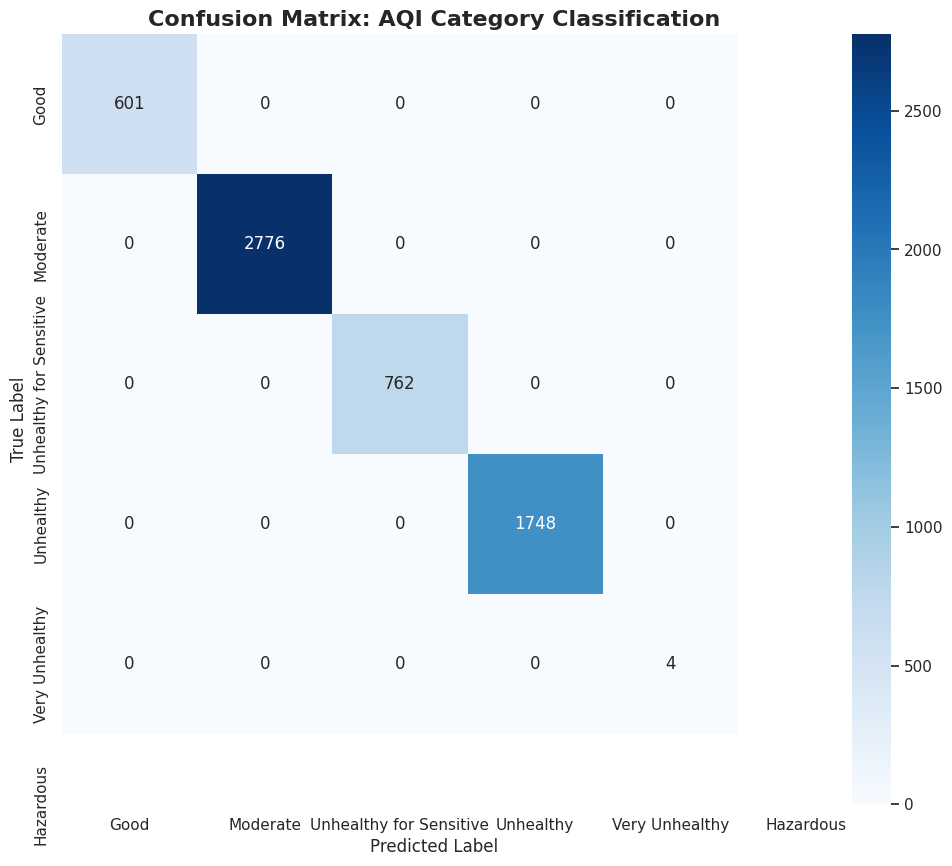

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Define the correct order of categories for the matrix axis
# This ensures the matrix flows logically from "Good" to "Hazardous"
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

# 2. Generate the Confusion Matrix
# y_test_clf: The actual true categories (encoded or string)
# y_pred: The predictions your model made
# Note: If your y values are integers (0,1,2...), map them back to strings or use the integer order
cm = confusion_matrix(y_test_encoded, y_pred_clf_encoded)

# 3. Create a Custom Heatmap specifically highlighting Critical Failures
plt.figure(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})

# 4. Highlight the "Triangle of Danger" (Upper Triangle)
# The upper triangle represents UNDER-estimation (e.g., Actual=Hazardous, Pred=Moderate)
# The lower triangle represents OVER-estimation (e.g., Actual=Good, Pred=Unhealthy)
plt.title('Confusion Matrix: AQI Category Classification', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# --- CRITICAL FAILURE ANALYSIS ---
# Let's verify specific dangerous cells programmatically
# Assuming the mapping: 0=Good, 1=Moderate ... 5=Hazardous
hazard_idx = 4  # Index for 'Hazardous'
mod_idx = 0     # Index for '1'

# Check: How many times was it Hazardous (5) but we predicted Moderate (1)?
critical_misses = cm[hazard_idx, mod_idx]
total_hazardous = np.sum(cm[hazard_idx, :])

print(f"--- CRITICAL SAFETY AUDIT ---")
print(f"Total 'Hazardous' Events in Test Set: {total_hazardous}")
print(f"CRITICAL FAILURES (Predicted 'Moderate' when 'Hazardous'): {critical_misses}")

if total_hazardous > 0:
    miss_rate = (critical_misses / total_hazardous) * 100
    print(f"Critical Miss Rate: {miss_rate:.2f}%")
else:
    print("No 'Hazardous' events found in test set to evaluate.")

# Check for "Very Unhealthy" misses as well
vu_idx = 4 # Index for 'Very Unhealthy'
vu_misses = cm[vu_idx, mod_idx]
print(f"SEVERE FAILURES (Predicted 'Moderate' when 'Very Unhealthy'): {vu_misses}")

plt.show()